# Check Data


In [1]:
import pandas as pd
import torch

%cd /content
df1 = pd.read_csv("3_datafile1.csv")
df2 = pd.read_csv("3_datafile2.csv")

#데이터 전처리 - .인 부분 0으로 치환
df1=df1.replace('.',0)
df2=df2.replace('.',0)


#데이터 내의 모든 값을 float형식으로 바꿔줌
df=pd.concat([df1,df2])
df=df.astype(float)

#ID별 행의 수 count
df['ID'].value_counts()

[WinError 2] 지정된 파일을 찾을 수 없습니다: '/content'
c:\development\nivolumab\etc


FileNotFoundError: [Errno 2] No such file or directory: '3_datafile1.csv'

In [ ]:
print(df)

        Unnamed: 0      ID   time         CP    amt   rate    EGFR  SEX  \
0              1.0  4001.0    0.0   0.000000  240.0  480.0  115.67  0.0   
1              2.0  4001.0    0.0   0.000000  240.0  480.0  115.67  0.0   
2              3.0  4001.0    0.5  38.957210  240.0  480.0  115.67  0.0   
3              4.0  4001.0    1.0  38.919018  240.0  480.0  115.67  0.0   
4              5.0  4001.0    1.5  38.880869  240.0  480.0  115.67  0.0   
...            ...     ...    ...        ...    ...    ...     ...  ...   
673995       670.0  6000.0  334.0  13.780725  240.0  480.0  122.66  1.0   
673996       671.0  6000.0  334.5  13.770314  240.0  480.0  122.66  1.0   
673997       672.0  6000.0  335.0  13.759912  240.0  480.0  122.66  1.0   
673998       673.0  6000.0  335.5  13.749519  240.0  480.0  122.66  1.0   
673999       674.0  6000.0  336.0  13.739135  240.0  480.0  122.66  1.0   

           BW  BPS  
0       46.80  0.0  
1       46.80  0.0  
2       46.80  0.0  
3       46.80  

In [ ]:
# 데이터 처리와 상관없는 ID열을 제거
df.drop(["Unnamed: 0"], axis=1, inplace=True)
# 투약이 일정하기에, AMT가 0이 아닌 행들을 제거(AMT==0인 행만 남겨좋기)
df = df[df.time != 0]

# DV를 제일 마지막으로 보내준다 -> 나중에 train x y로 나눌 때 label(결과값)을 제일 뒤로 빼주는 것이 데이터 처리하기 편함
df = df[["time", "amt", "rate", "EGFR", "SEX", "BW", "BPS", "CP"]]

# 데이터 전처리 완료
print(df)

         time    amt   rate    EGFR  SEX     BW  BPS         CP
2         0.5  240.0  480.0  115.67  0.0  46.80  0.0  38.957210
3         1.0  240.0  480.0  115.67  0.0  46.80  0.0  38.919018
4         1.5  240.0  480.0  115.67  0.0  46.80  0.0  38.880869
5         2.0  240.0  480.0  115.67  0.0  46.80  0.0  38.842764
6         2.5  240.0  480.0  115.67  0.0  46.80  0.0  38.804702
...       ...    ...    ...     ...  ...    ...  ...        ...
673995  334.0  240.0  480.0  122.66  1.0  61.26  0.0  13.780725
673996  334.5  240.0  480.0  122.66  1.0  61.26  0.0  13.770314
673997  335.0  240.0  480.0  122.66  1.0  61.26  0.0  13.759912
673998  335.5  240.0  480.0  122.66  1.0  61.26  0.0  13.749519
673999  336.0  240.0  480.0  122.66  1.0  61.26  0.0  13.739135

[1344000 rows x 8 columns]


# 코드


In [ ]:
# seq_length : LSTM에서 이전 데이터를 저장하는 길이
seq_length = 30
batch = 10

# train test 비율 7:3으로 나누기
print(len(df))
train_test_ratio = int(len(df) * 0.7)
train_set = df[0:940800]
test_set = df[940800:]

print(train_set)
print(test_set)

1344000
         time    amt   rate    EGFR  SEX     BW  BPS         CP
2         0.5  240.0  480.0  115.67  0.0  46.80  0.0  38.957210
3         1.0  240.0  480.0  115.67  0.0  46.80  0.0  38.919018
4         1.5  240.0  480.0  115.67  0.0  46.80  0.0  38.880869
5         2.0  240.0  480.0  115.67  0.0  46.80  0.0  38.842764
6         2.5  240.0  480.0  115.67  0.0  46.80  0.0  38.804702
...       ...    ...    ...     ...  ...    ...  ...        ...
269595  334.0  240.0  480.0  108.48  0.0  94.13  1.0   5.183923
269596  334.5  240.0  480.0  108.48  0.0  94.13  1.0   5.168601
269597  335.0  240.0  480.0  108.48  0.0  94.13  1.0   5.153329
269598  335.5  240.0  480.0  108.48  0.0  94.13  1.0   5.138109
269599  336.0  240.0  480.0  108.48  0.0  94.13  1.0   5.122940

[940800 rows x 8 columns]
         time    amt   rate    EGFR  SEX     BW  BPS         CP
269602    0.5  240.0  480.0   60.07  0.0  88.07  0.0  38.475388
269603    1.0  240.0  480.0   60.07  0.0  88.07  0.0  38.424513
26960

In [ ]:
y = train_set["CP"]

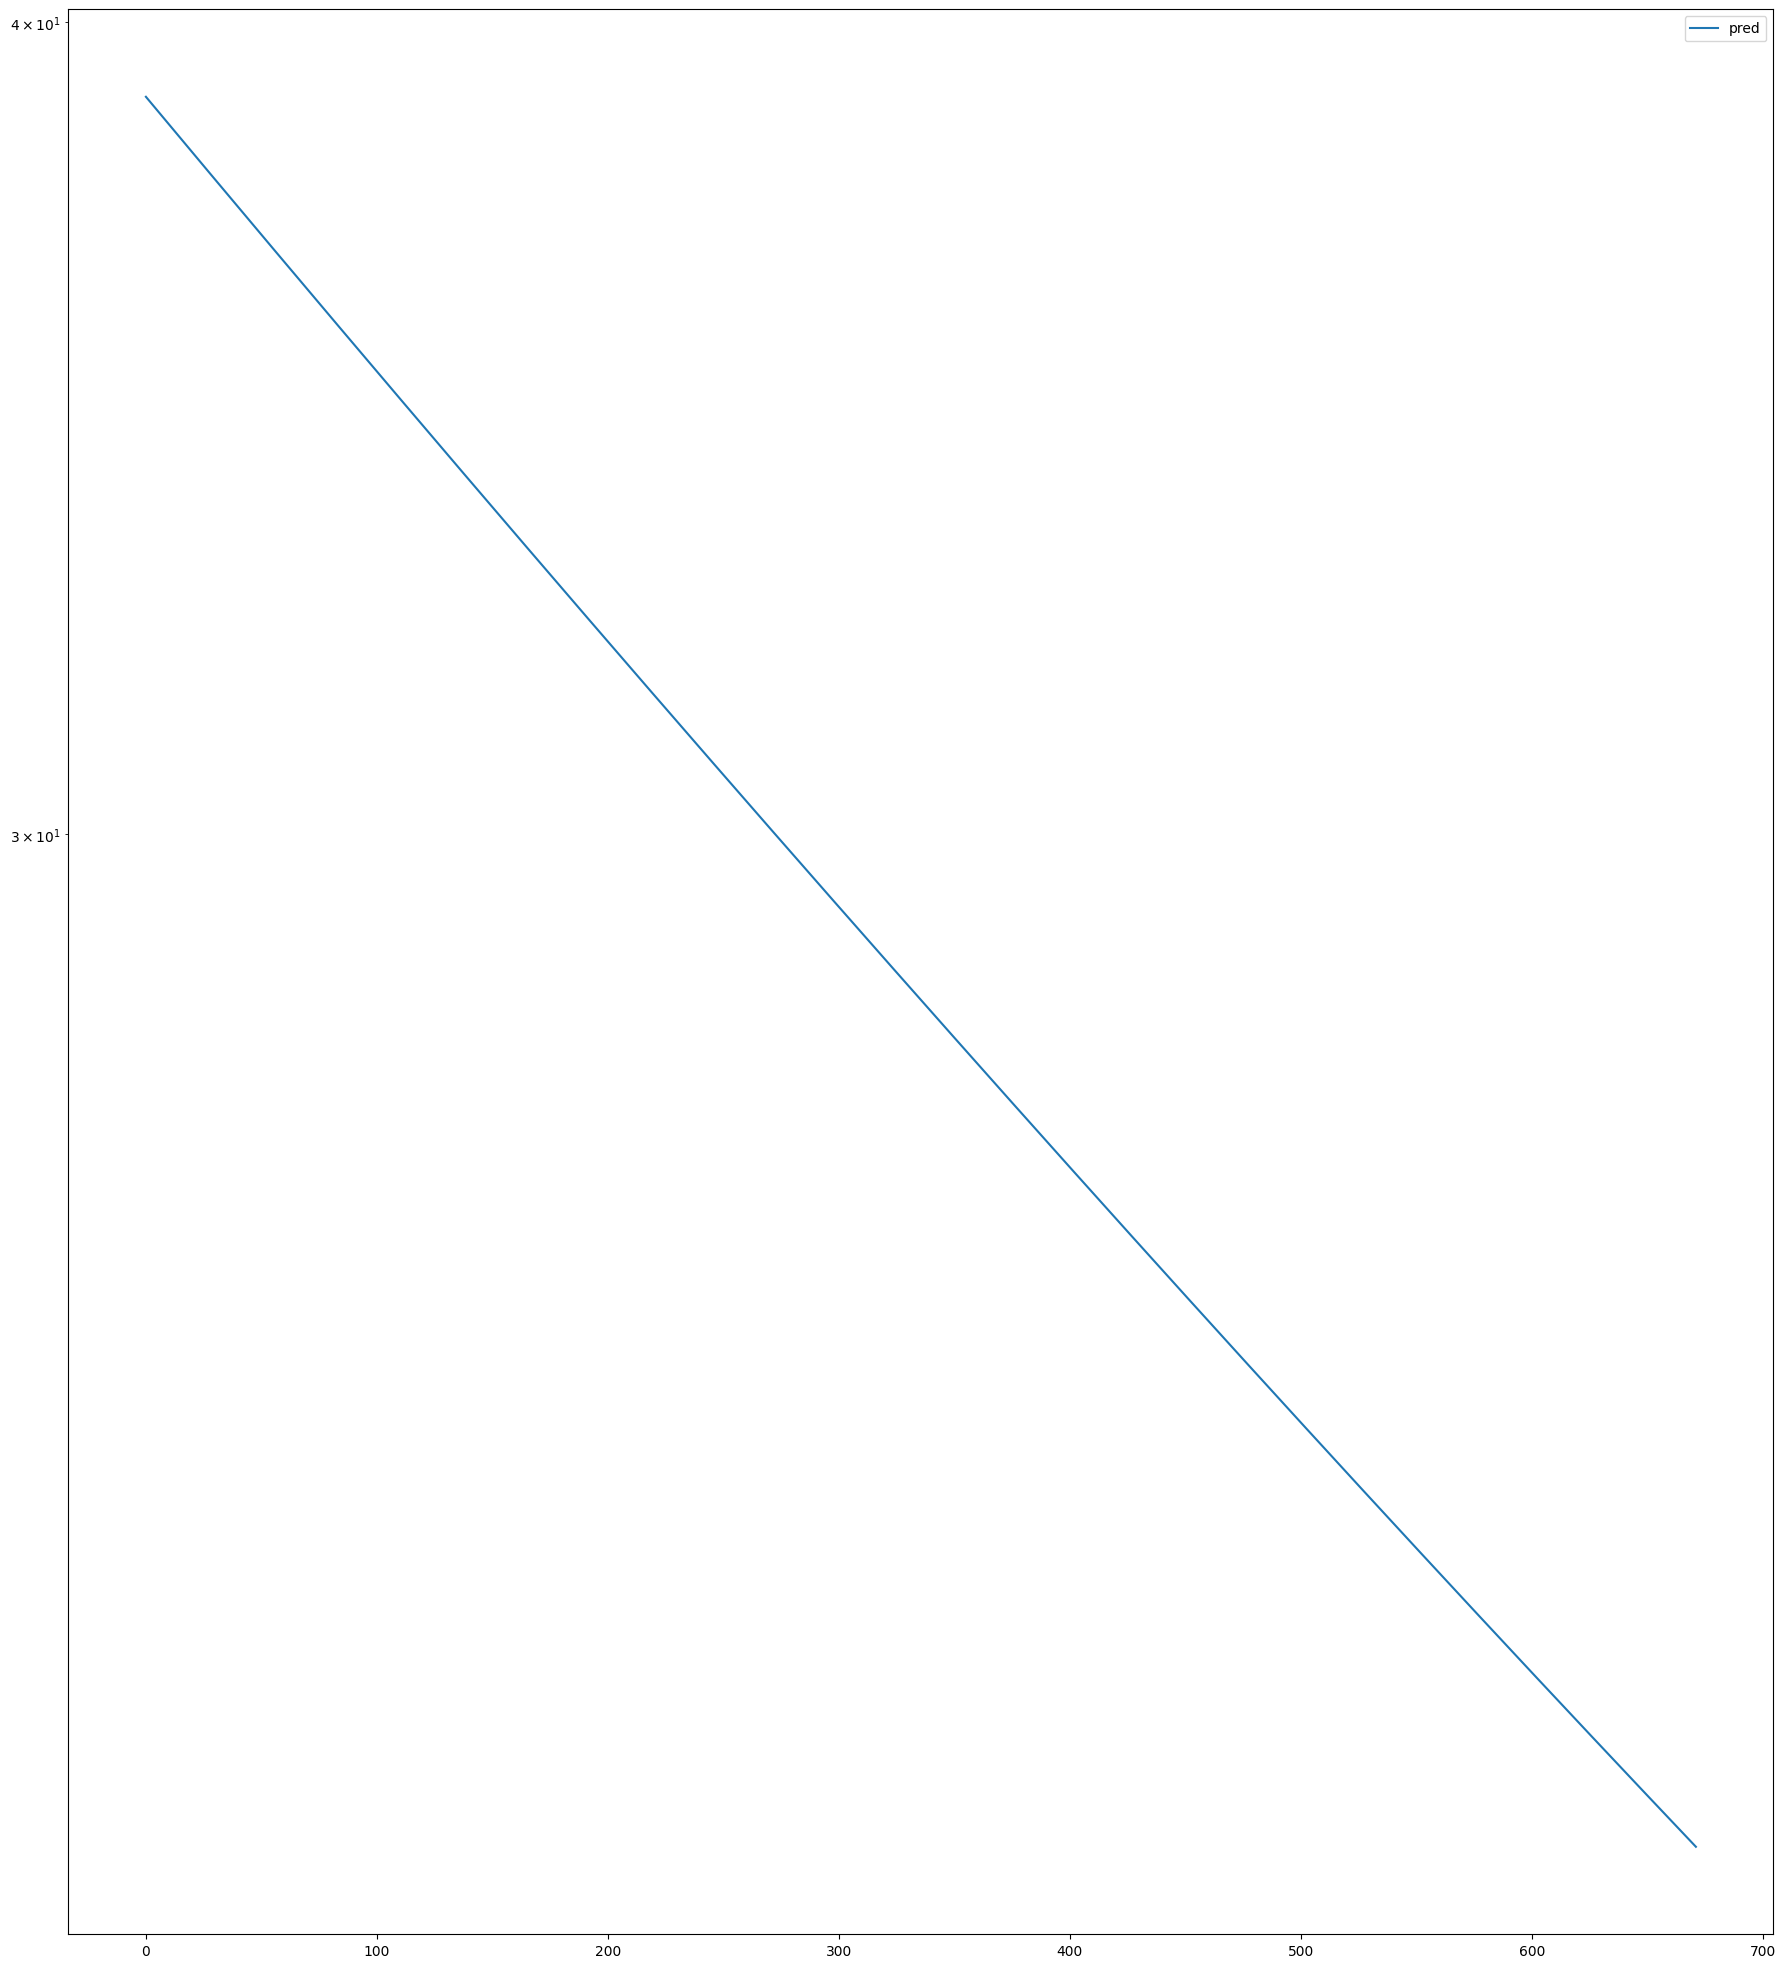

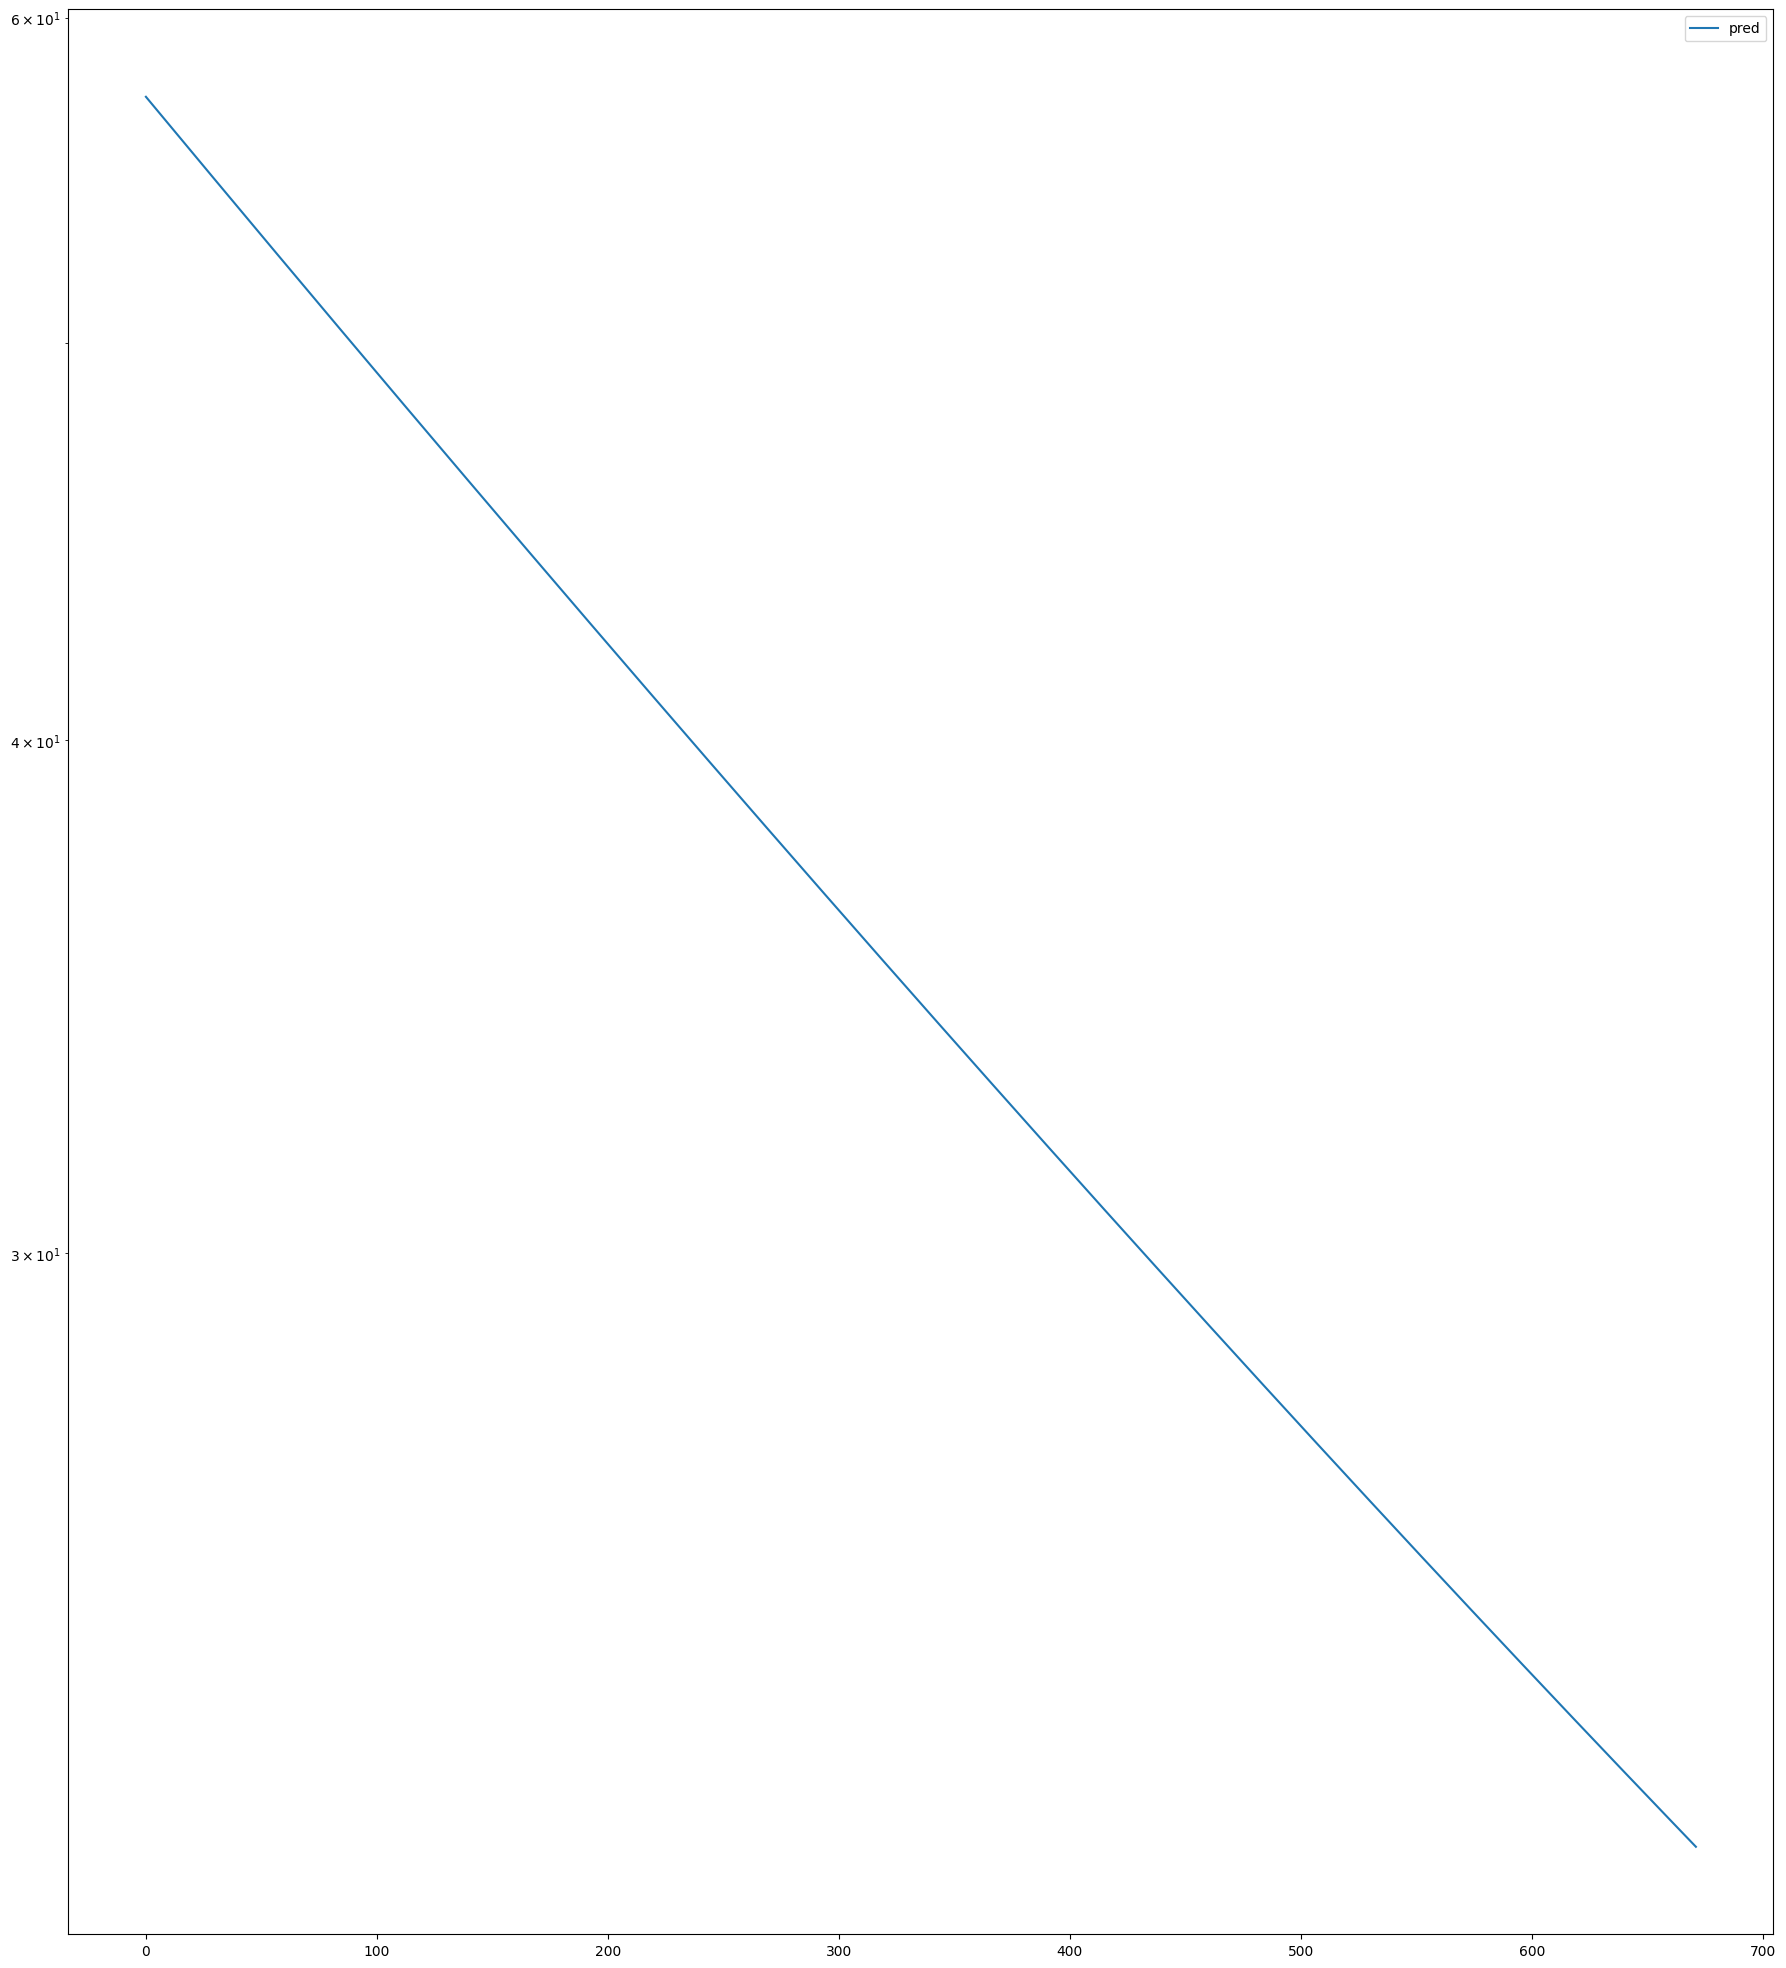

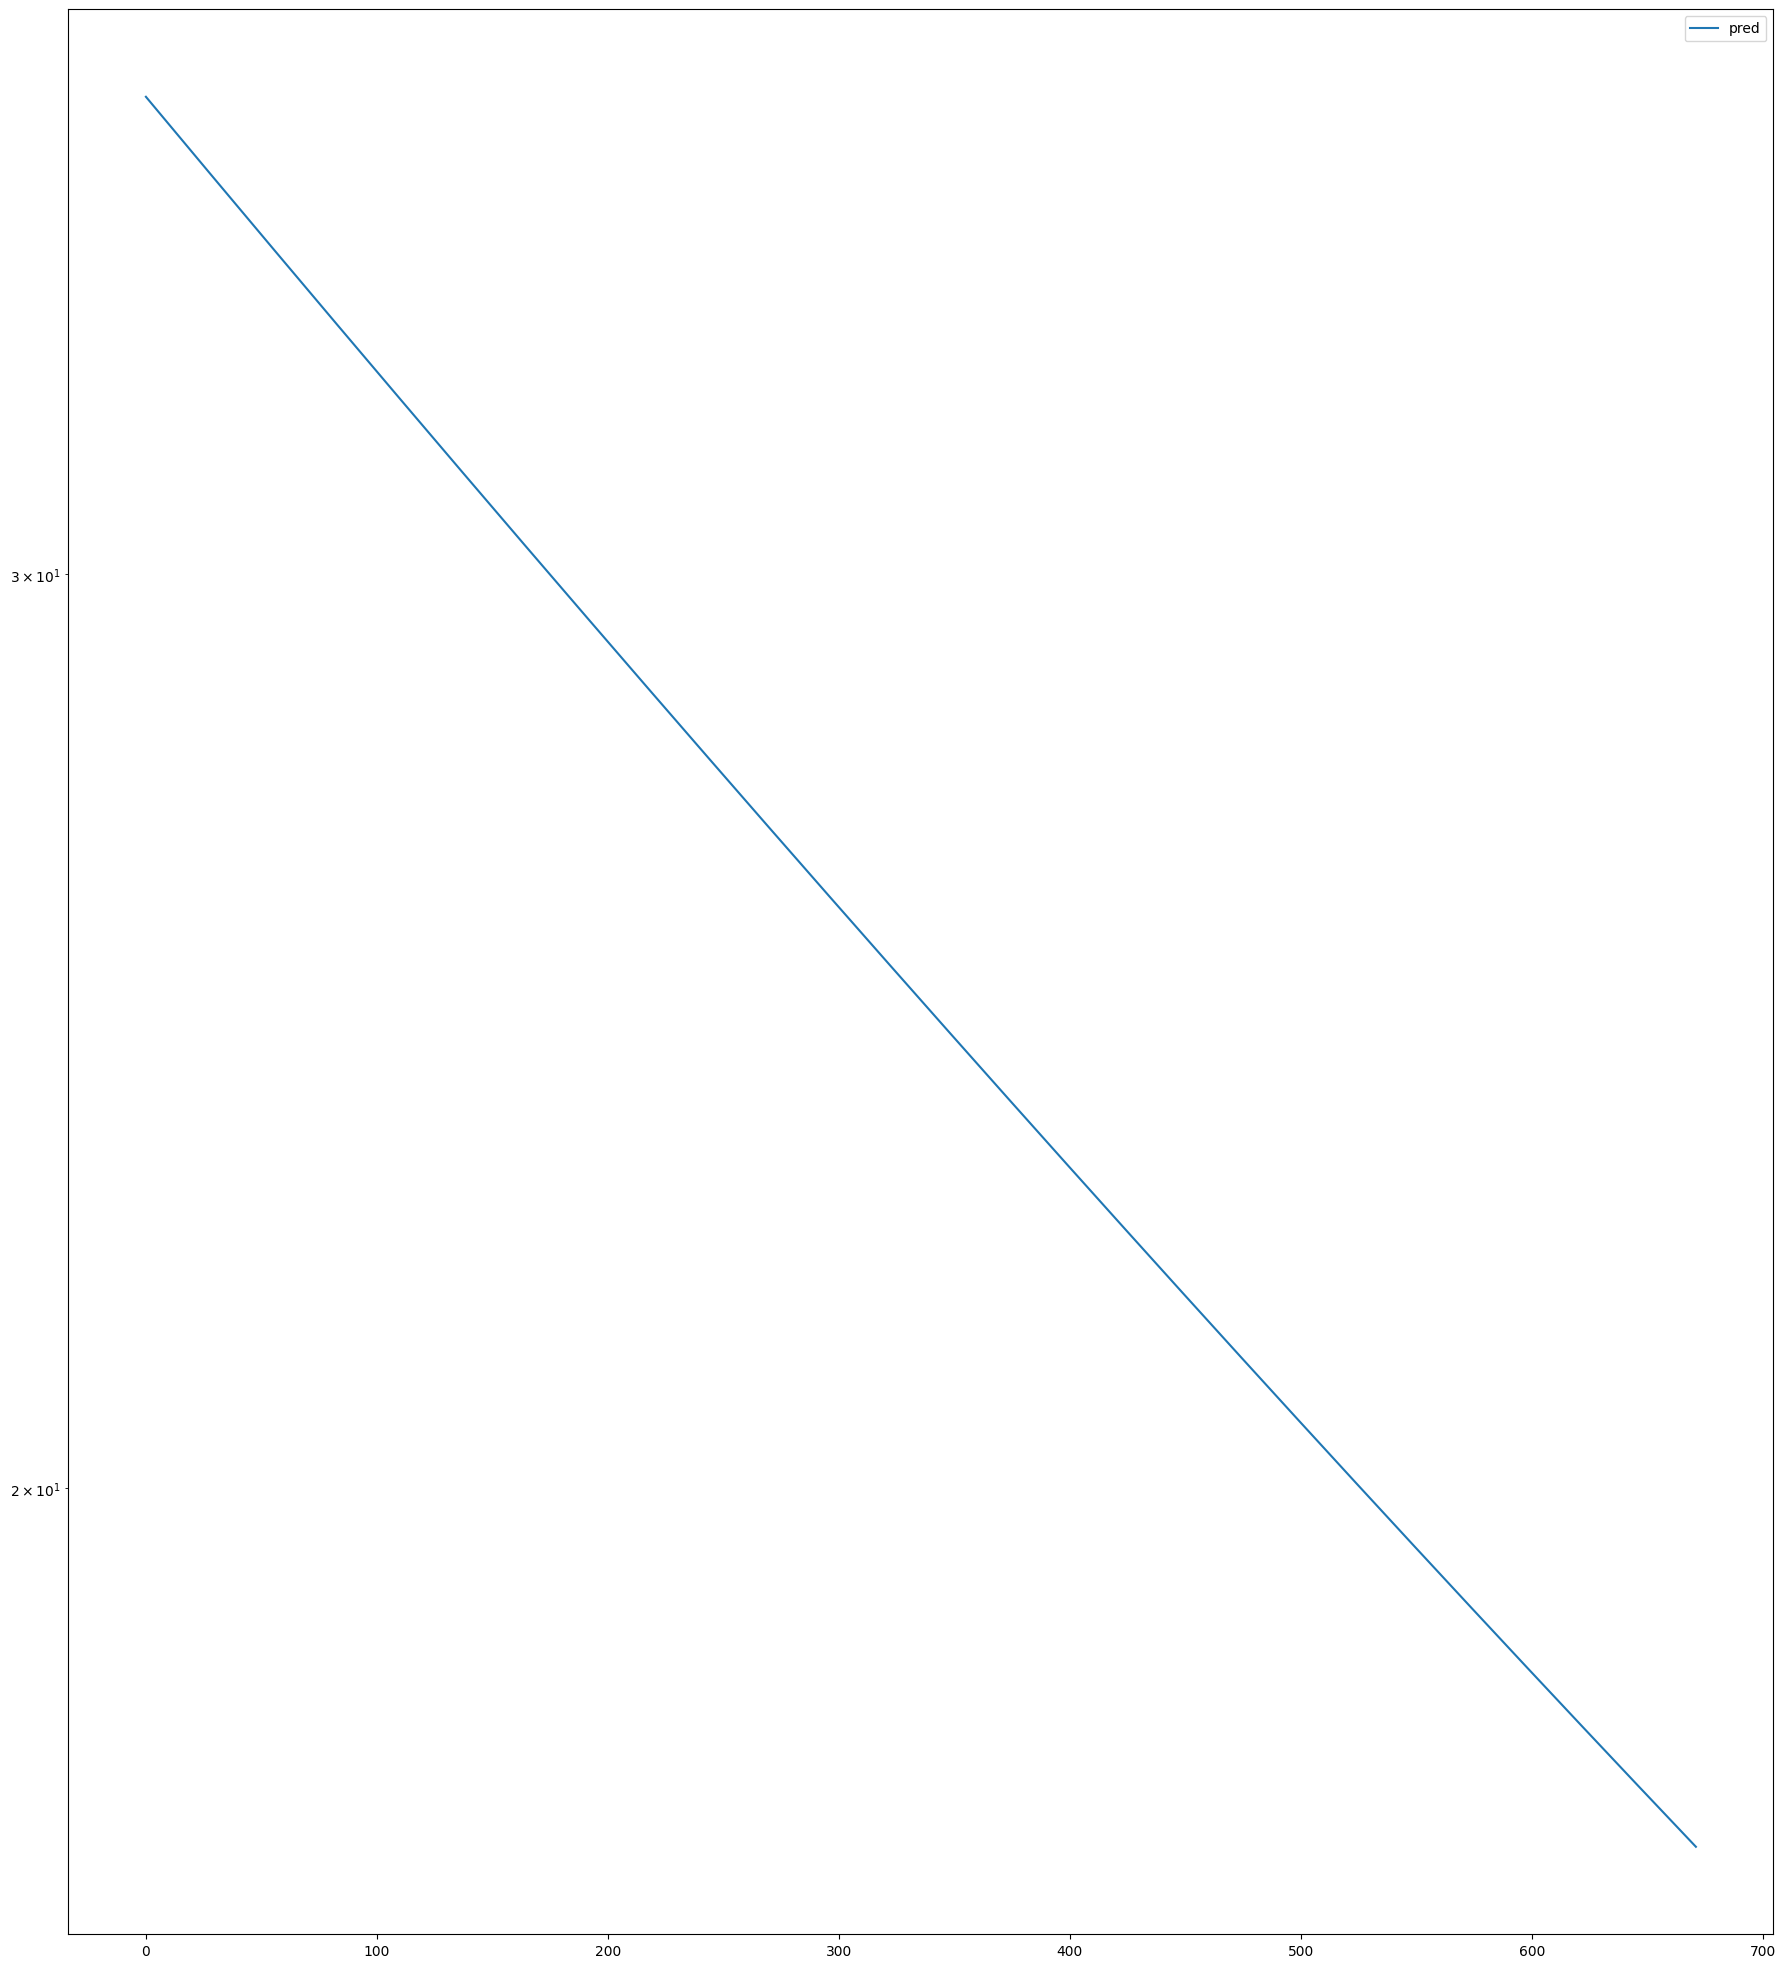

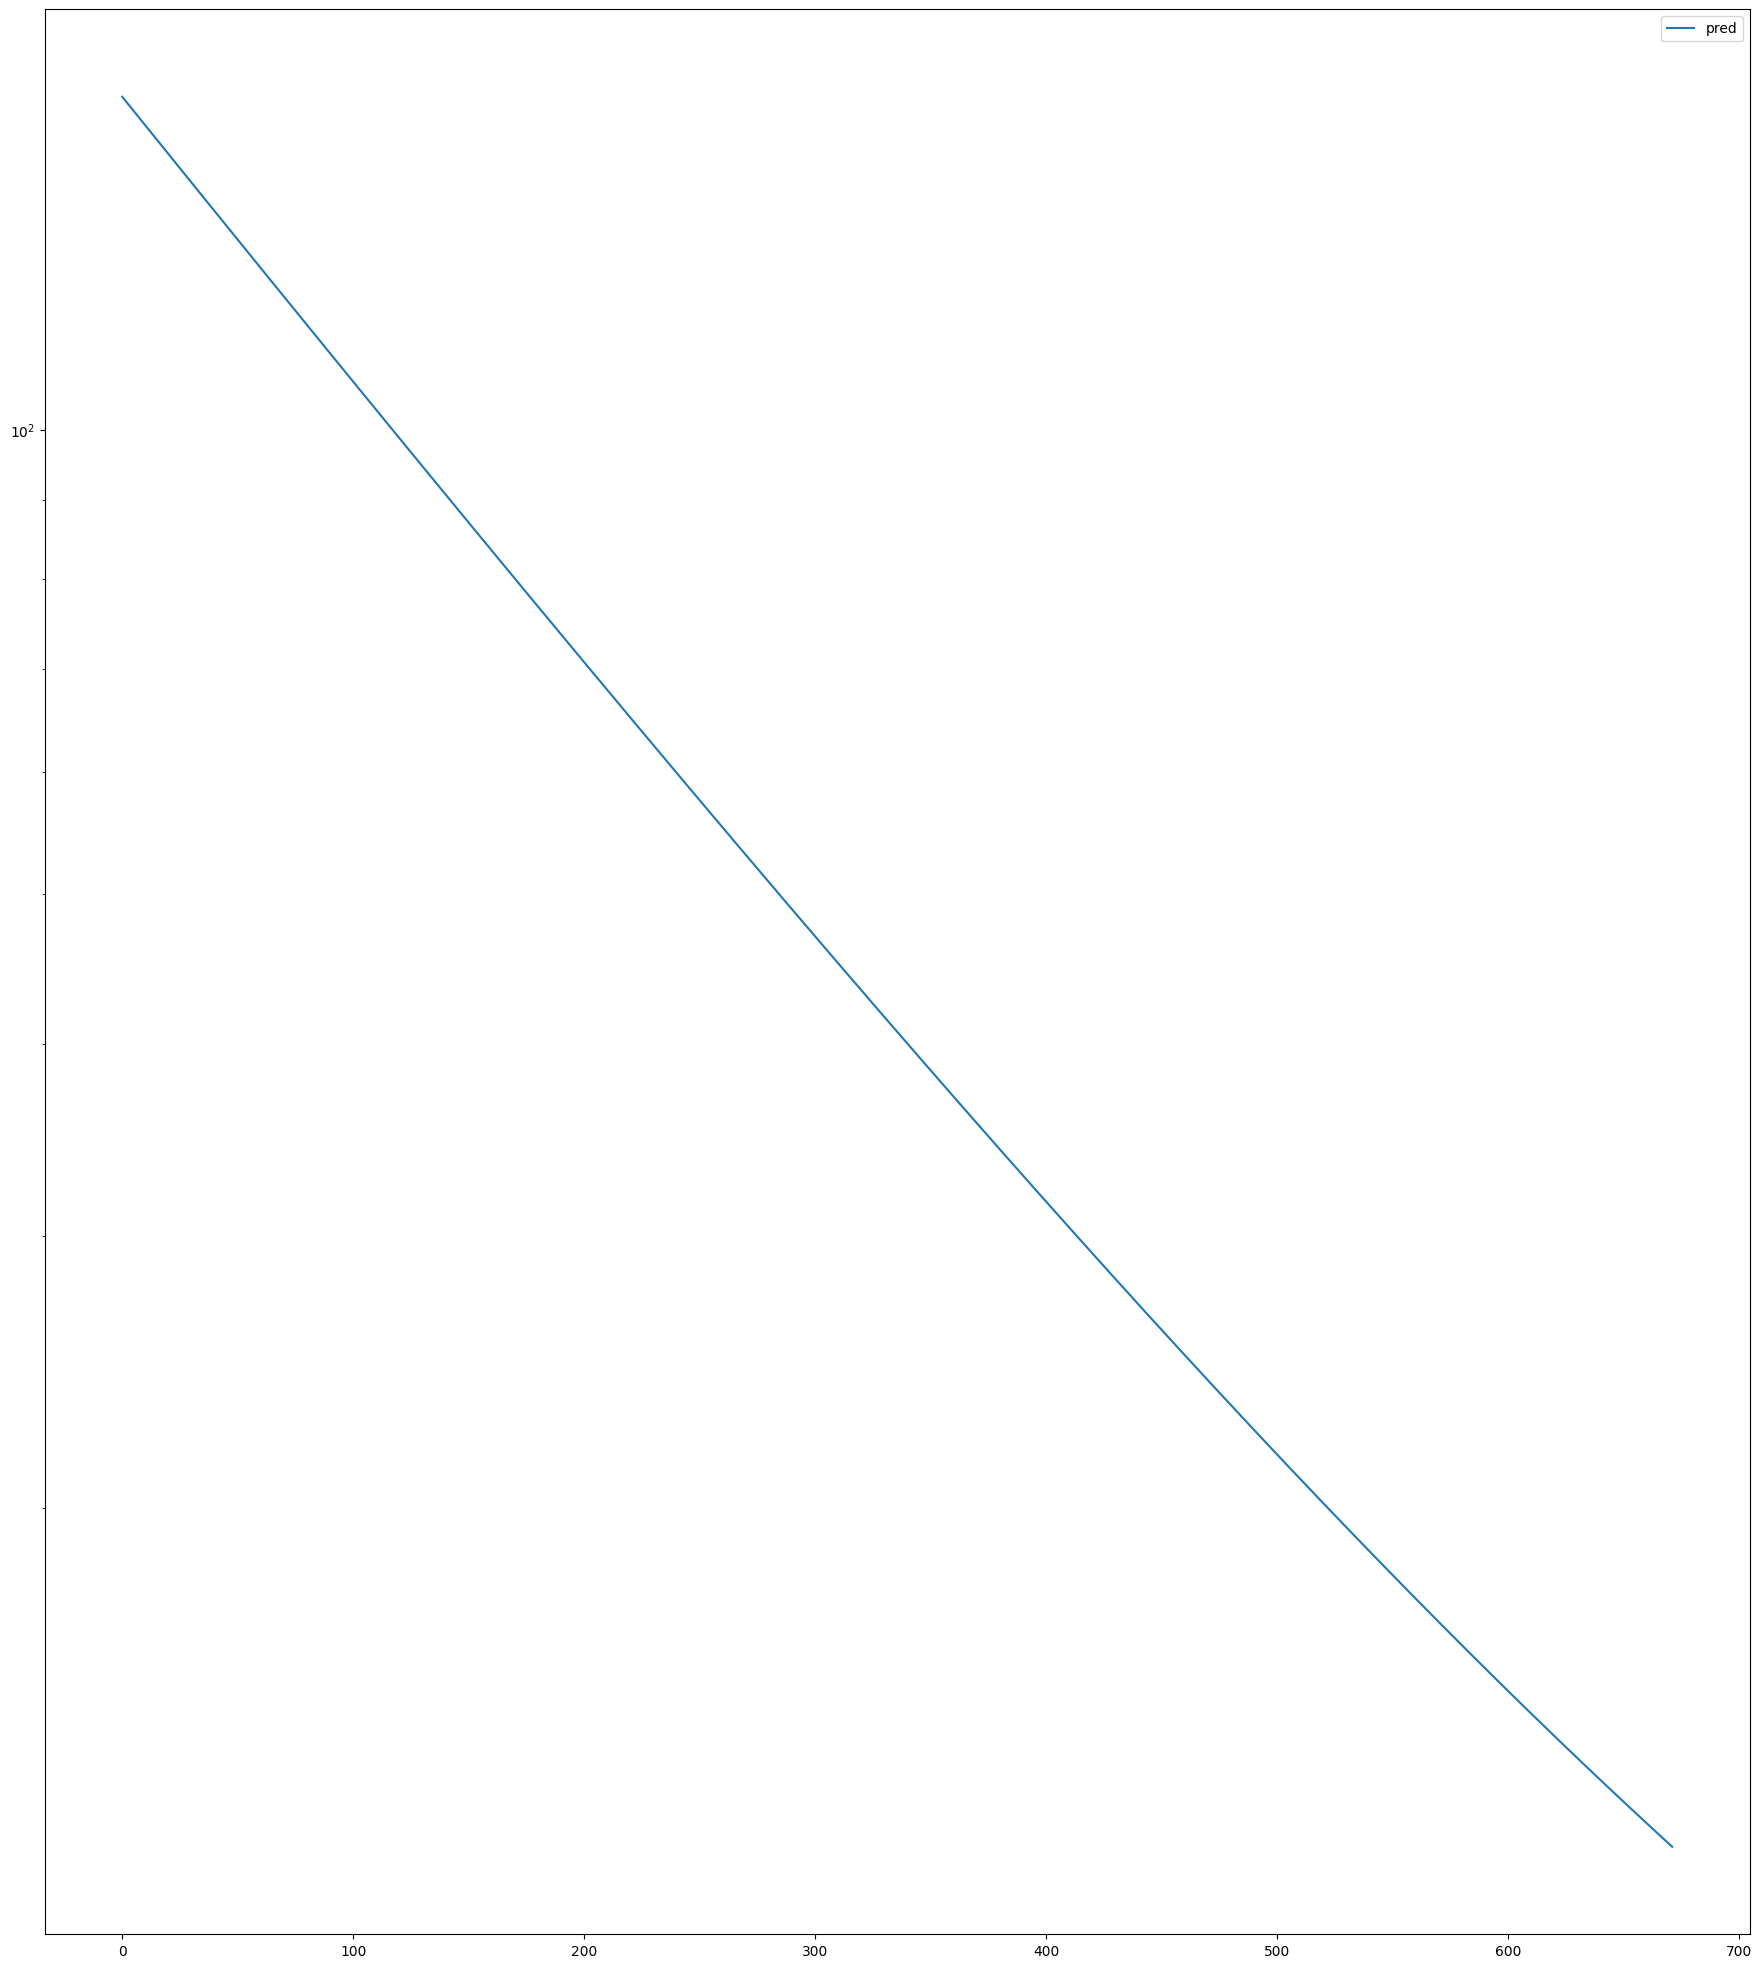

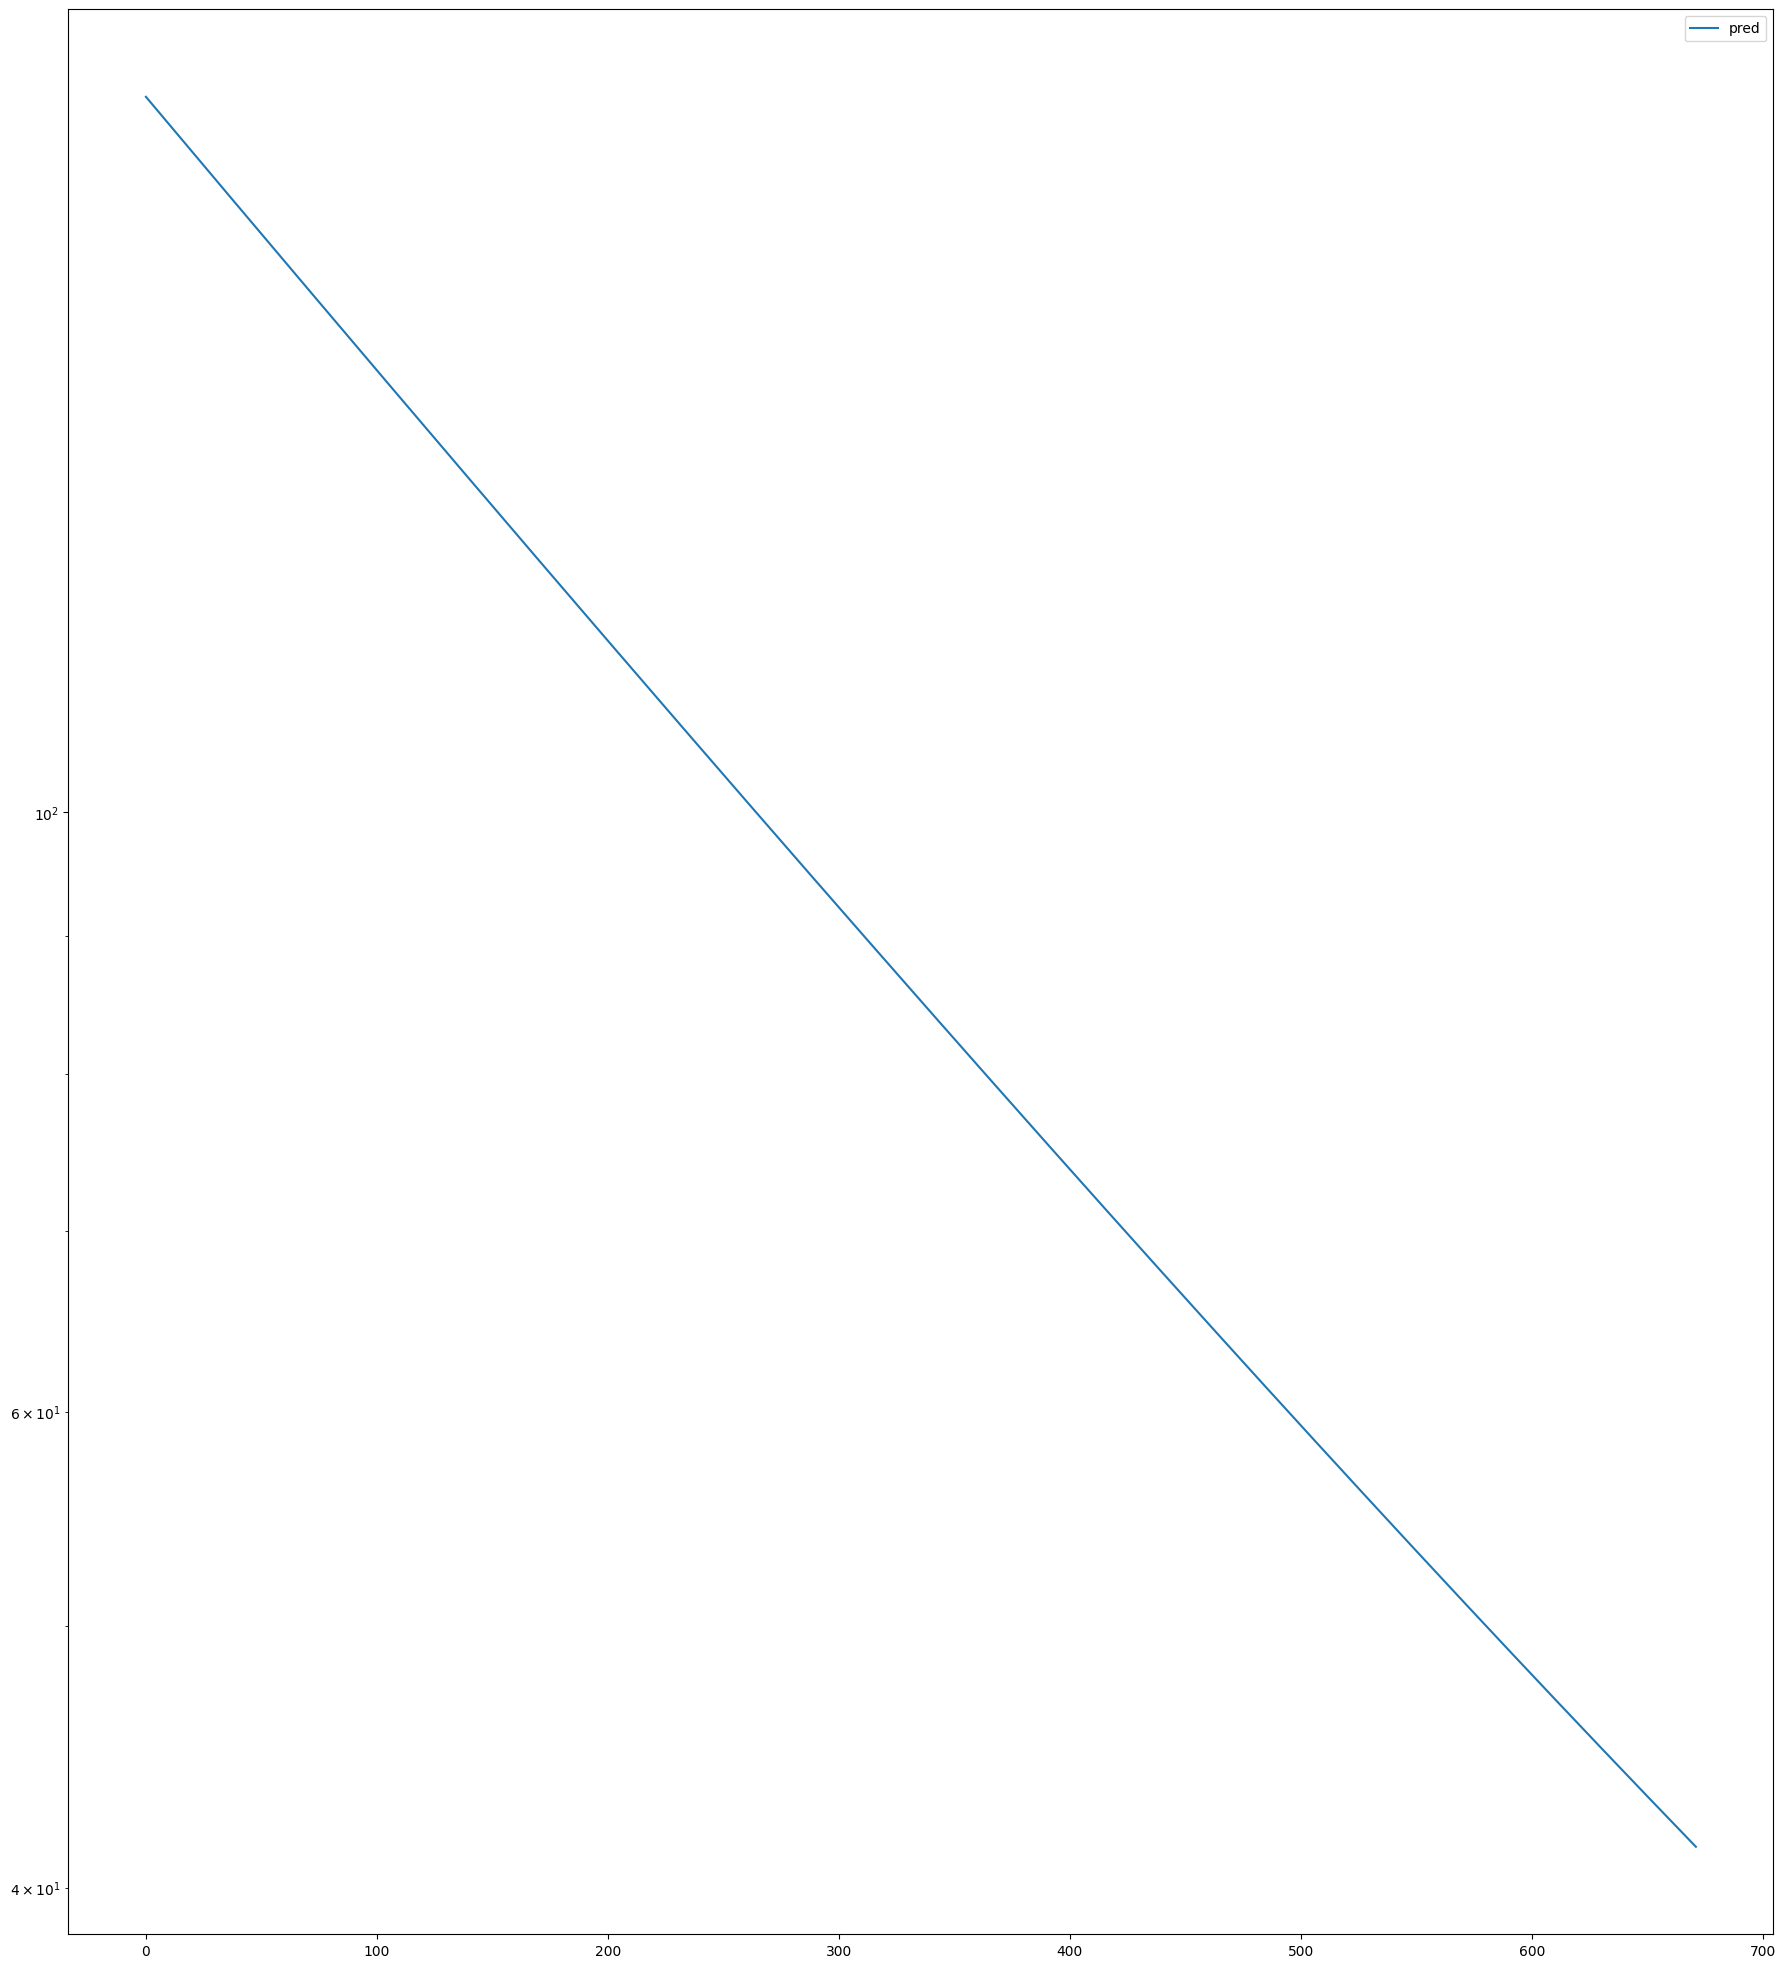

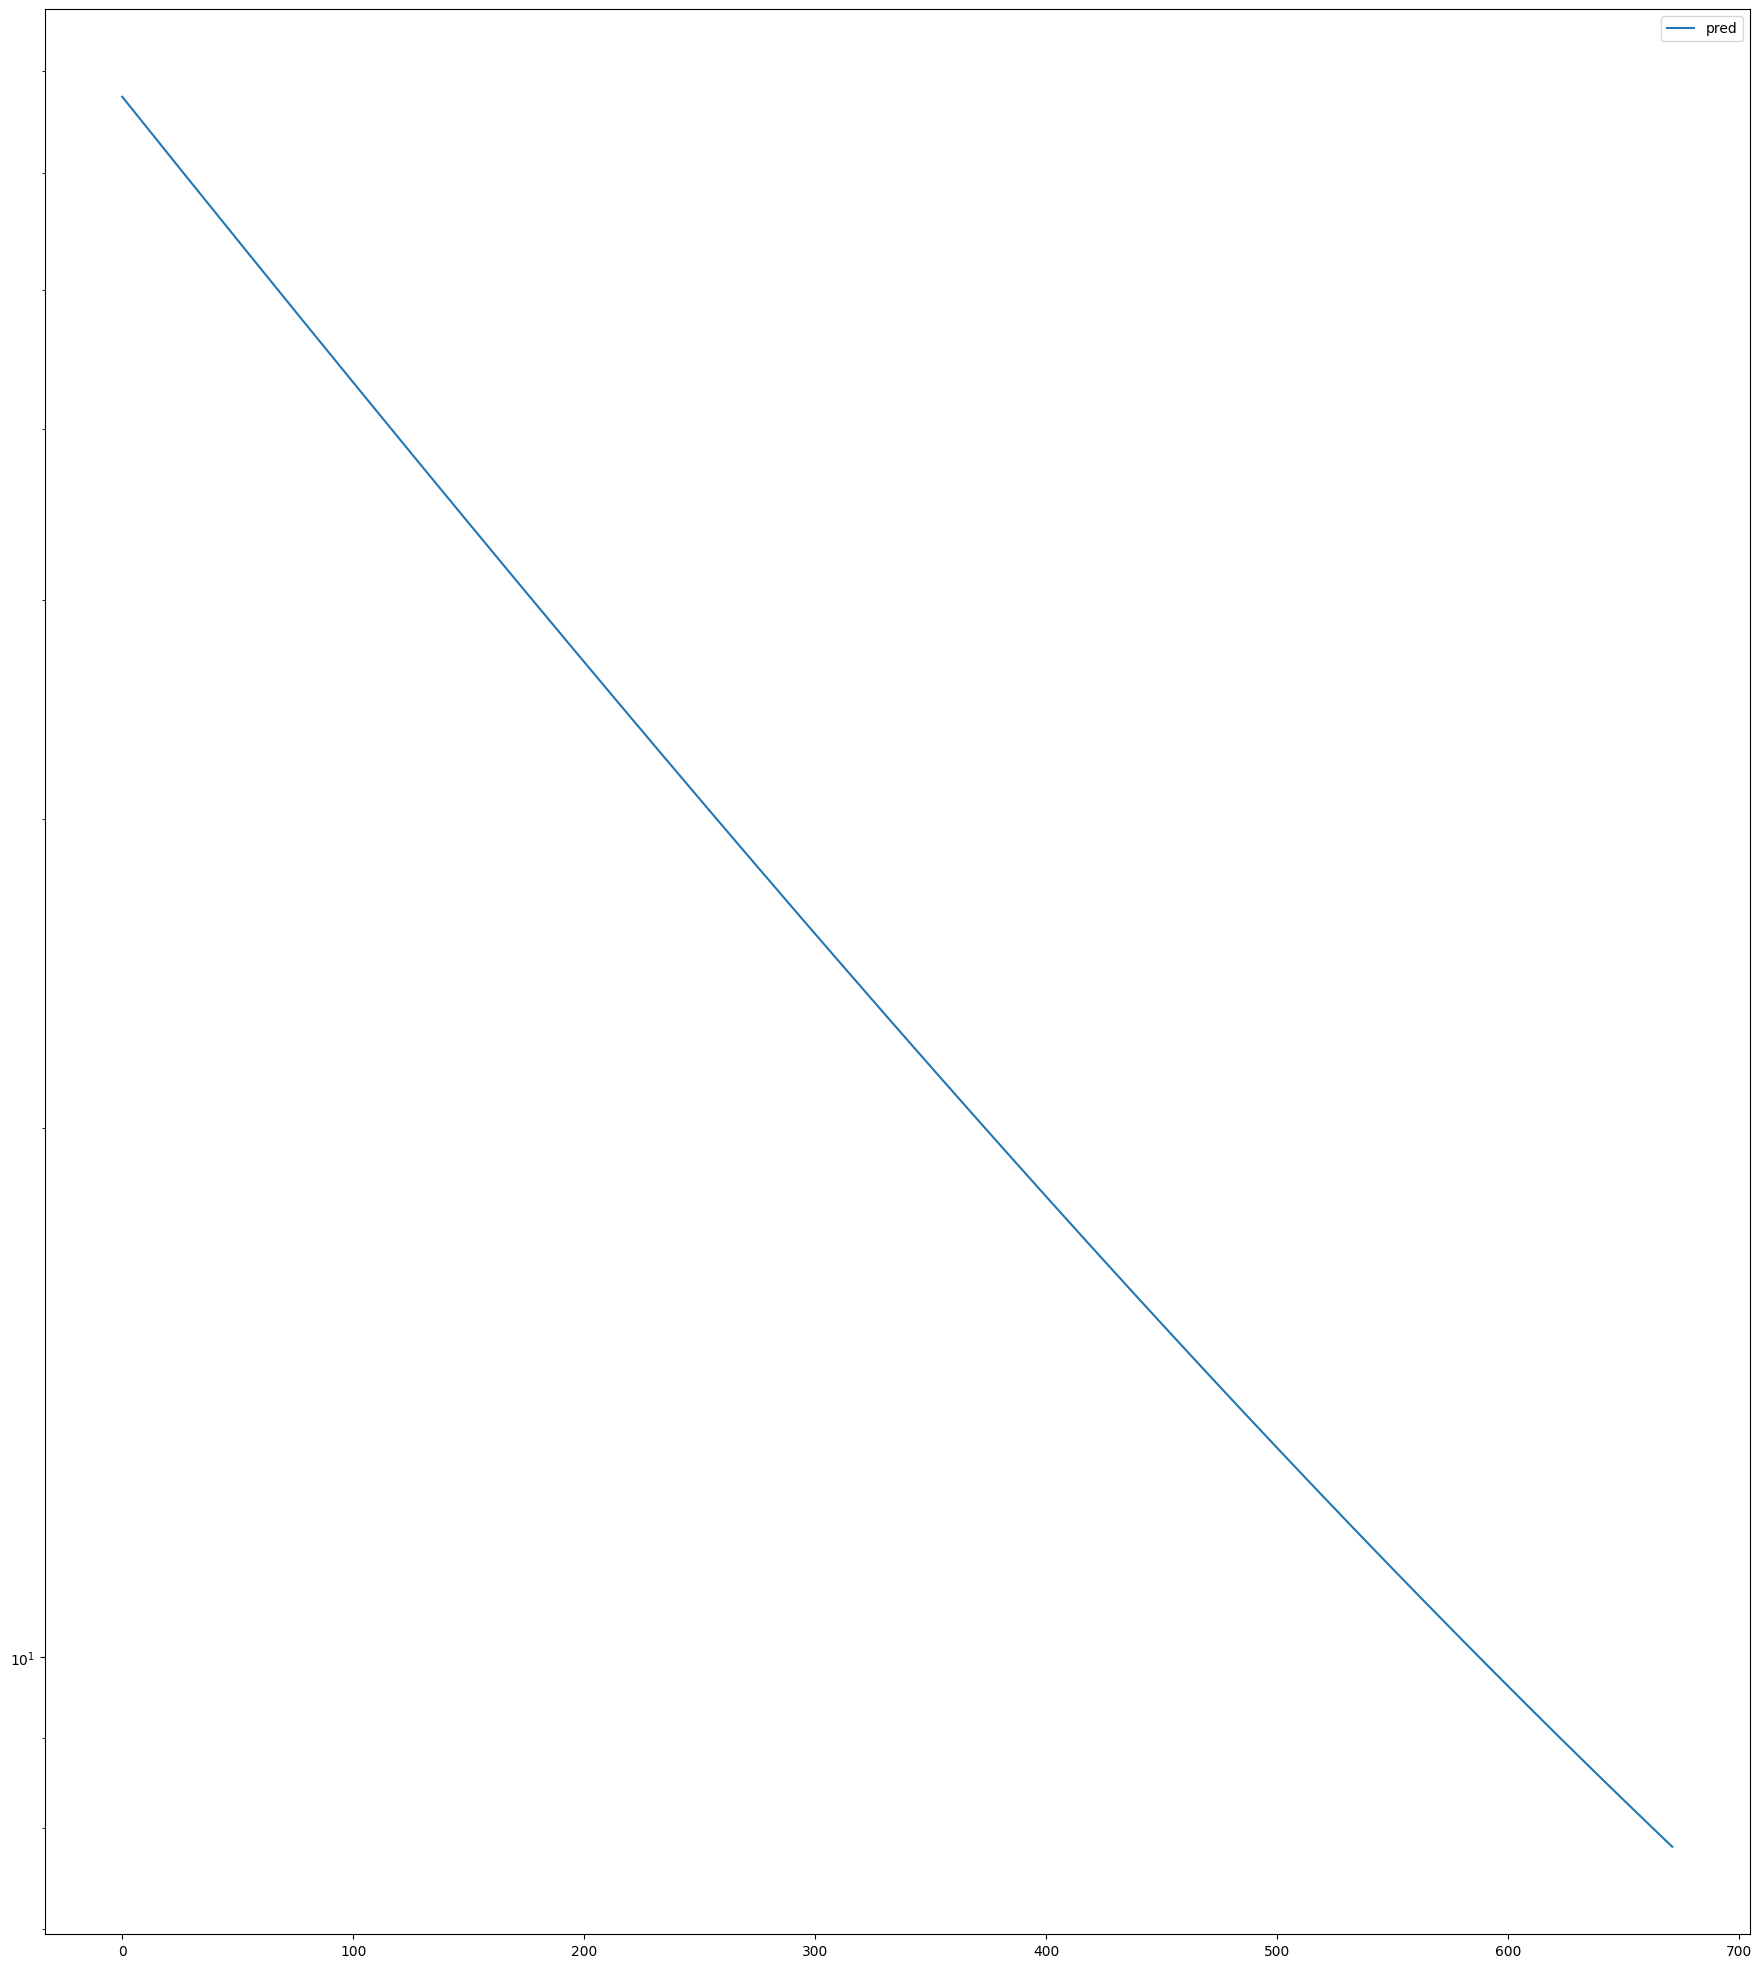

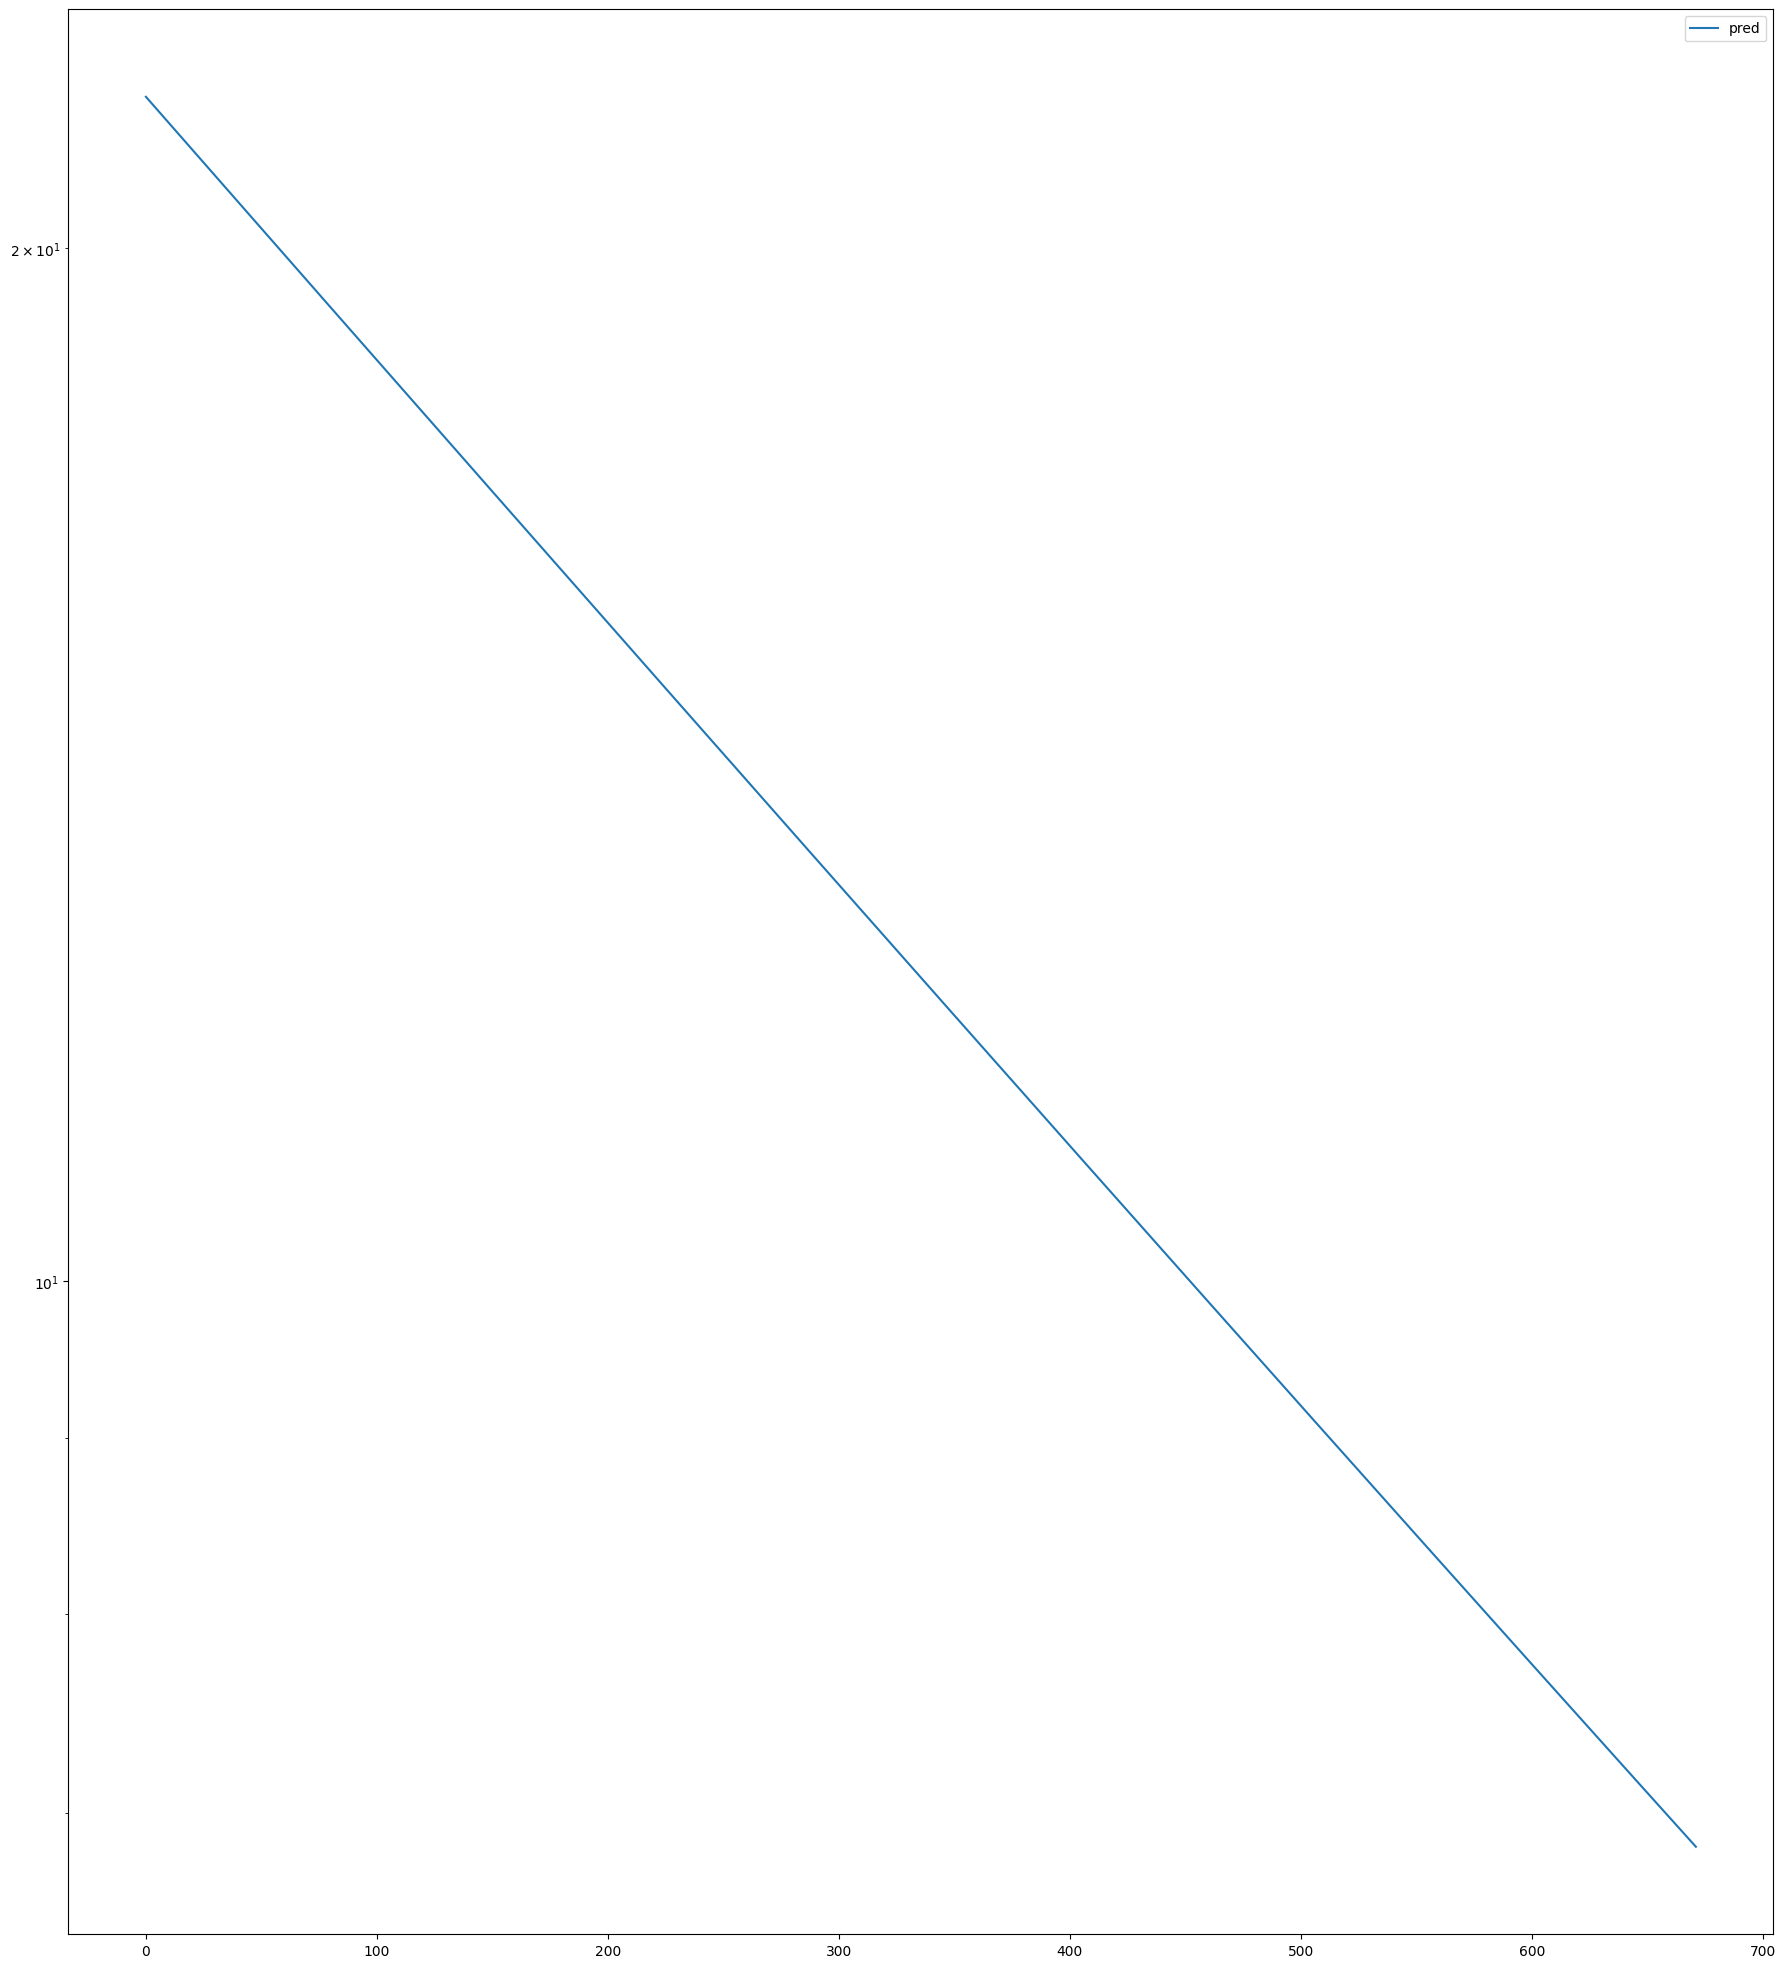

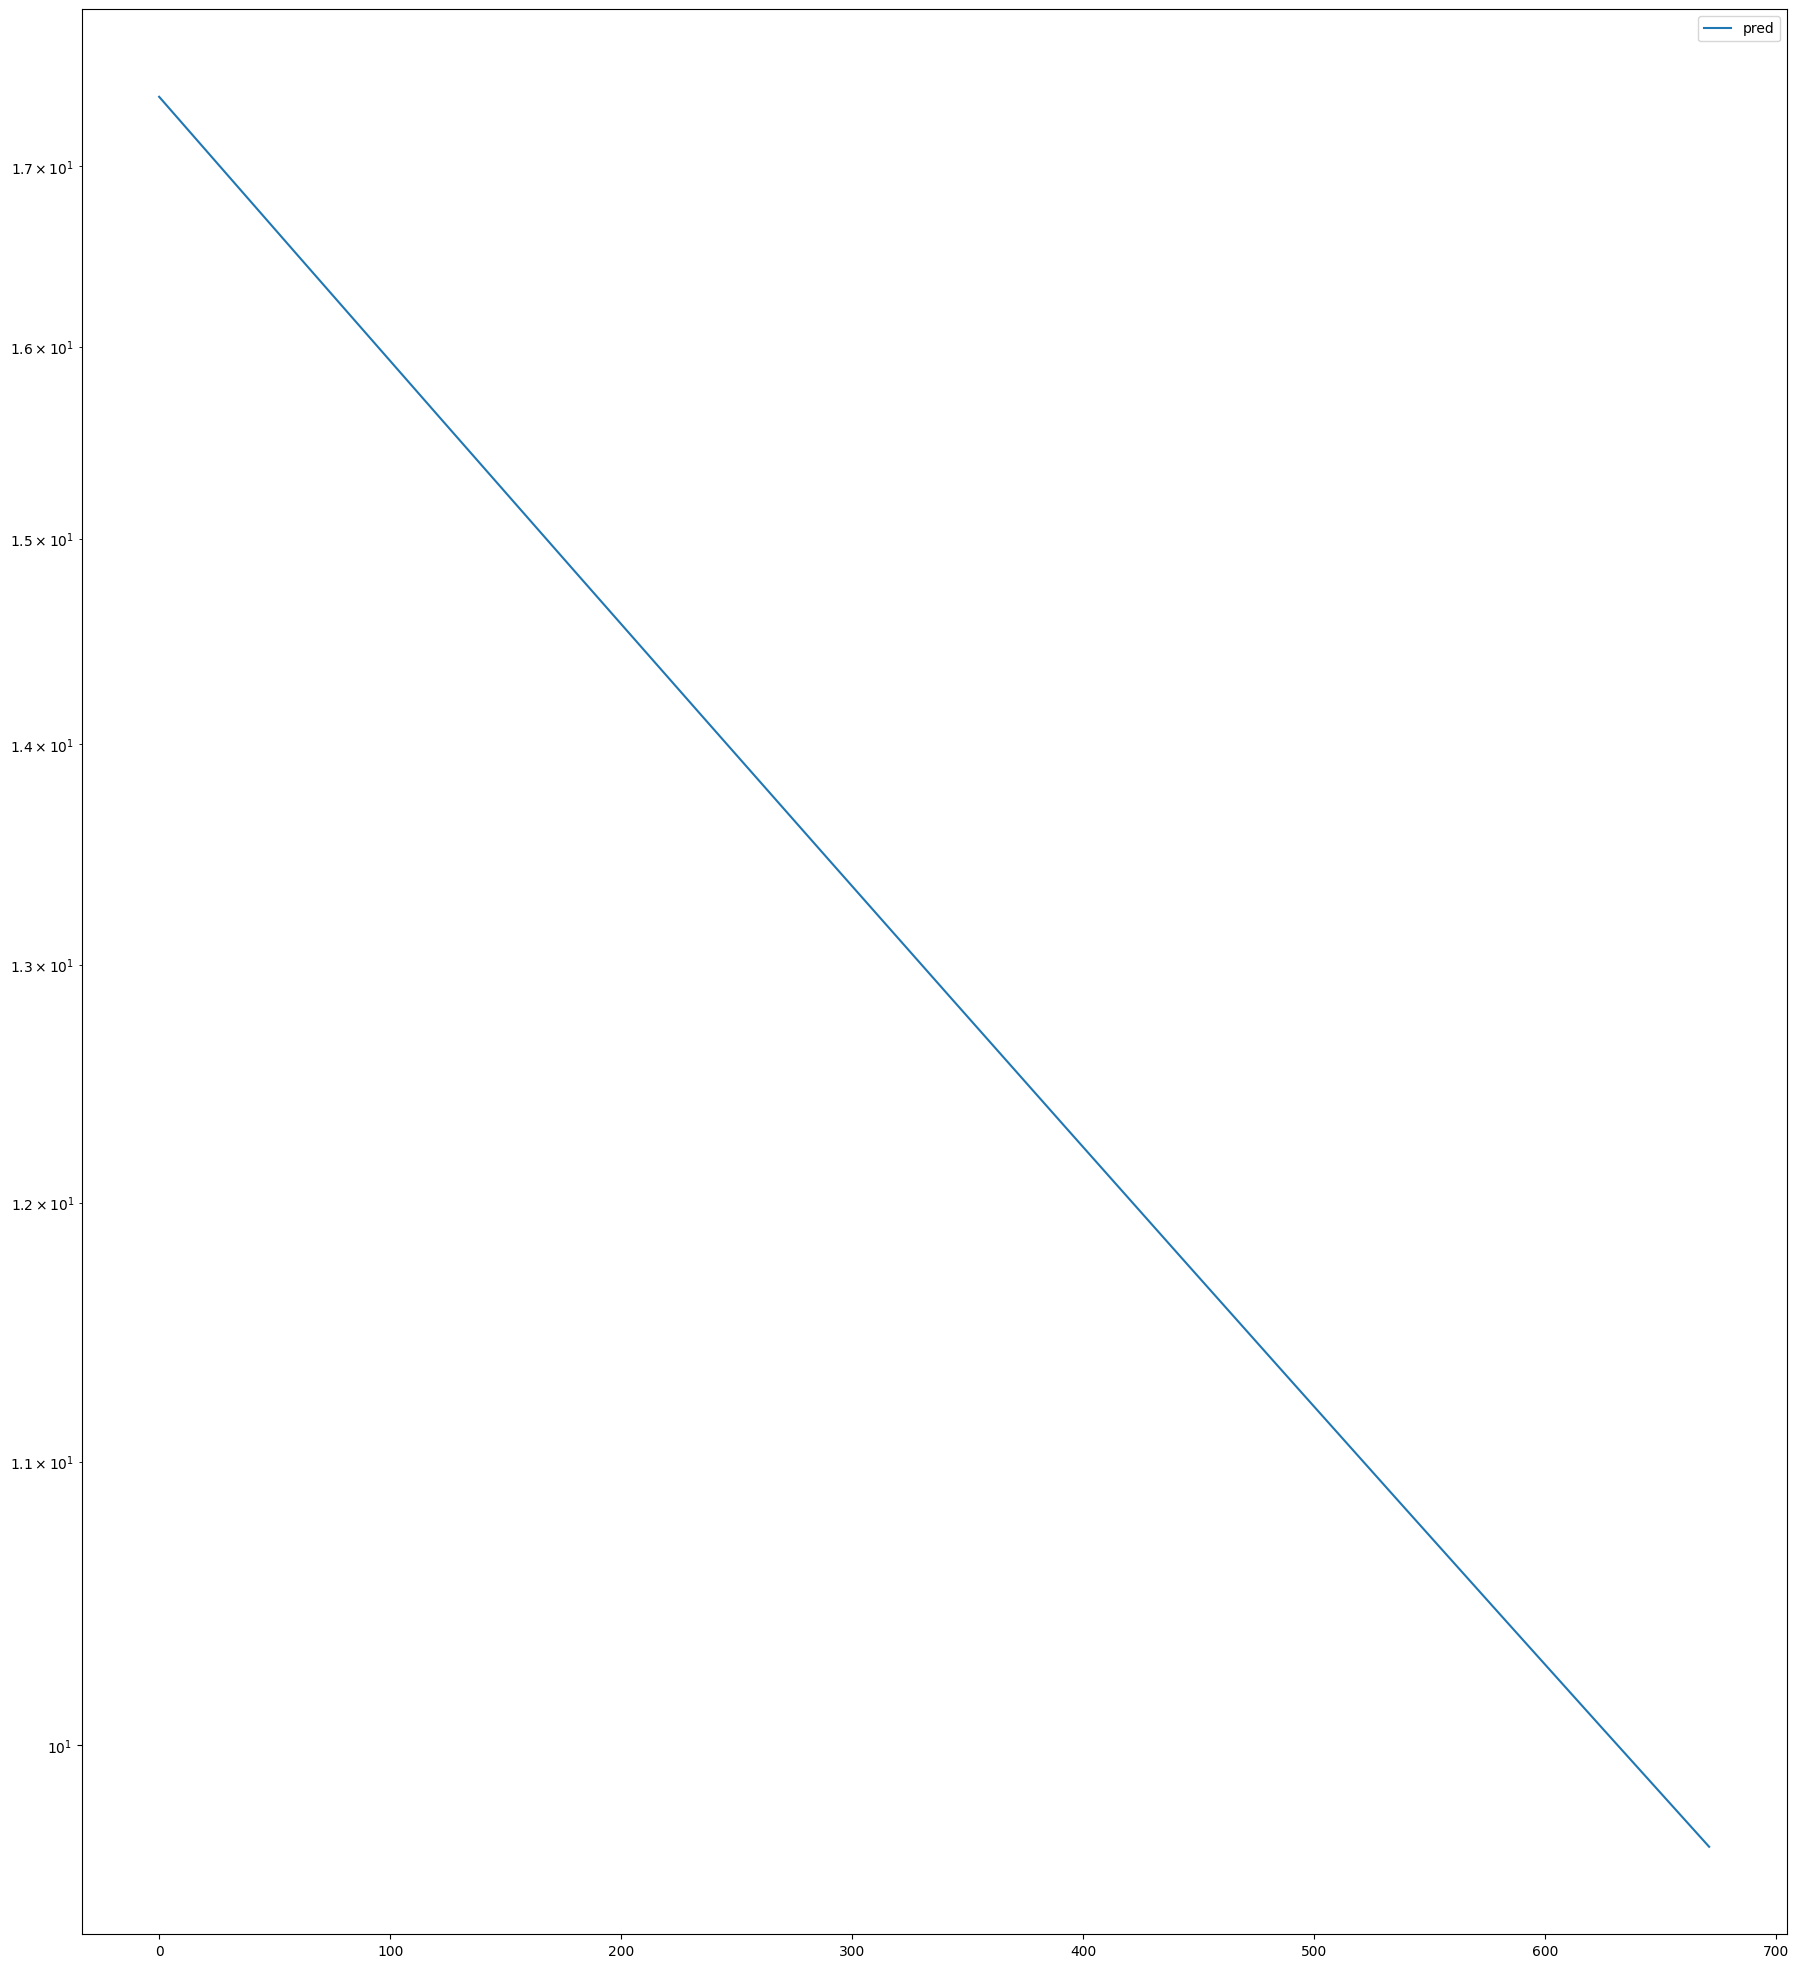

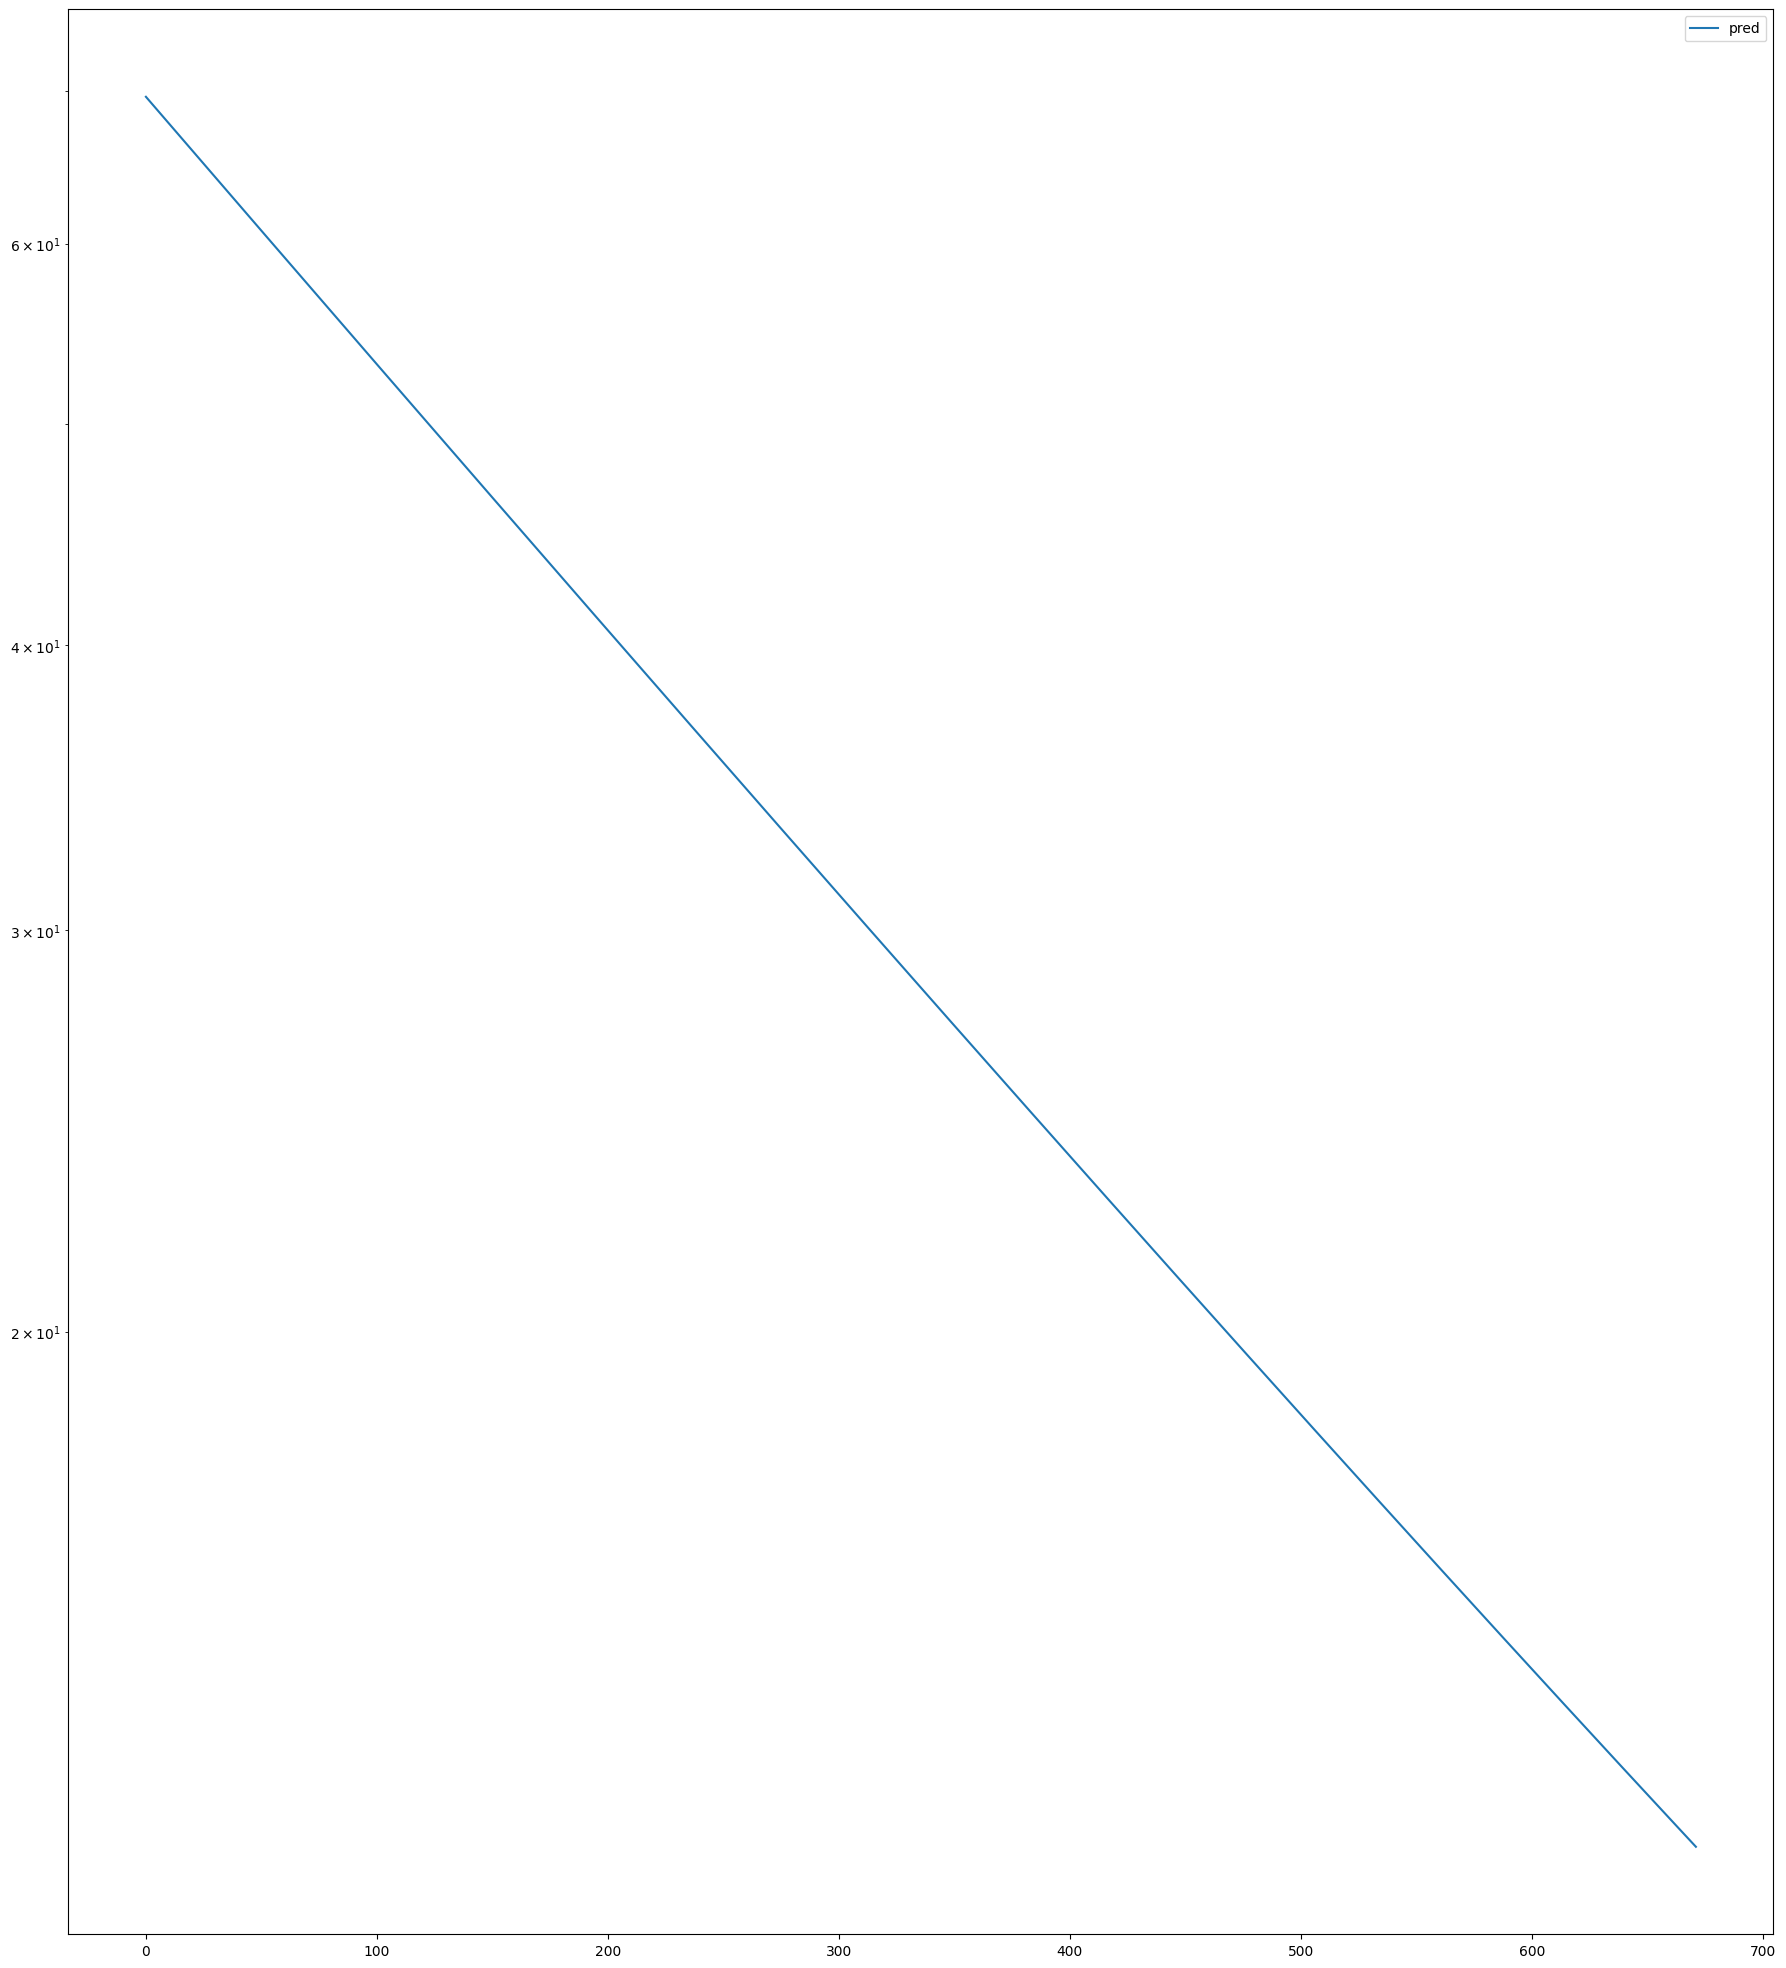

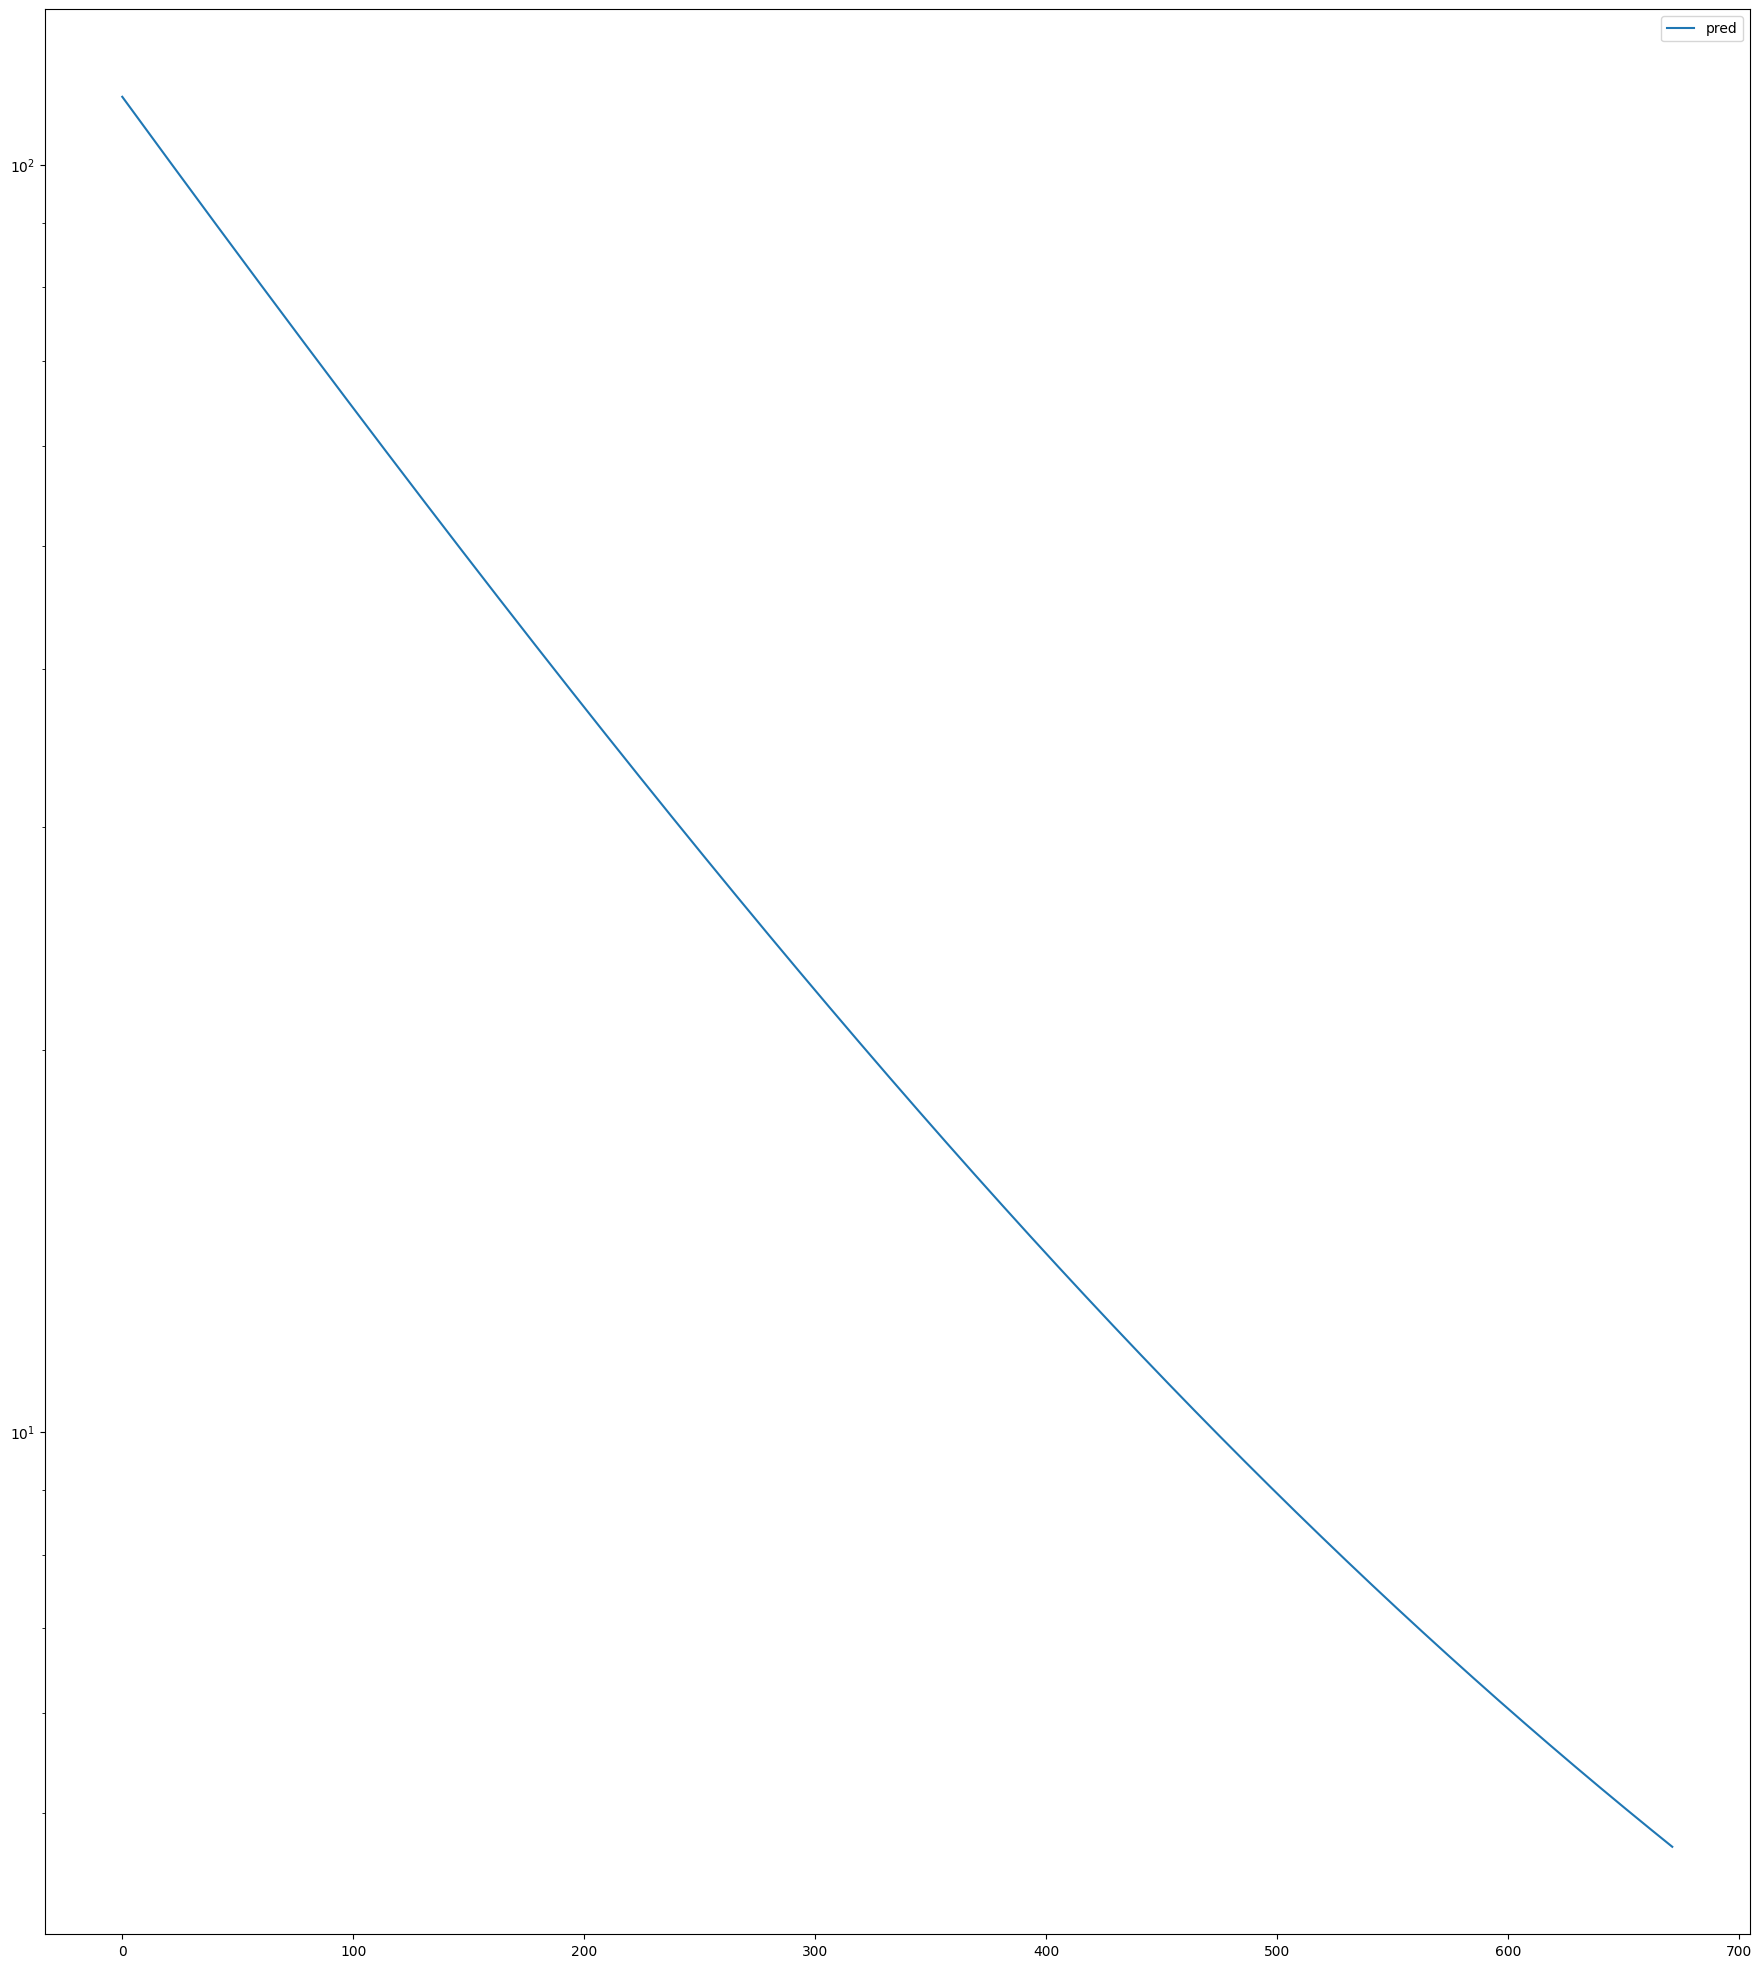

In [ ]:
from matplotlib import pyplot as plt


for i in range(10):
    plt.figure(figsize=(22, 25))
    plt.plot(range(672), y[i * 672 : (i + 1) * 672], label="pred")
    plt.yscale("log", base=10)
    plt.legend()
    plt.show()

Normalizing


Normalizing 하는 이유 : https://velog.io/@cbkyeong/ML%EC%A0%95%EA%B7%9C%ED%99%94normalization%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94standardization%EB%8A%94-%EC%99%9C-%ED%95%98%EB%8A%94%EA%B1%B8%EA%B9%8C


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# input scaling  - train_x, test_x
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])
# print(train_set.iloc[:, :-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

# print(train_set.iloc[:, :-1])

# input scaling - train_y, test_y
scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])
# print(train_set.iloc[:, [-1]])

train_set.iloc[:, [-1]] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, [-1]] = scaler_y.transform(test_set.iloc[:, [-1]])


# print(train_set.iloc[:, [-1]])

<ipython-input-7-94874849072b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
<ipython-input-7-94874849072b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])
<ipython-input-7-94874849072b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, [-1]] = scaler_y.transform(train_set.iloc[:, [

In [ ]:
# scaling된 input output 확인
print(test_set[0:672])

            time  amt  rate      EGFR  SEX        BW  BPS        CP
269602  0.000000  0.0   0.0  0.221534  0.0  0.431352  0.0  0.048493
269603  0.001490  0.0   0.0  0.221534  0.0  0.431352  0.0  0.048427
269604  0.002981  0.0   0.0  0.221534  0.0  0.431352  0.0  0.048362
269605  0.004471  0.0   0.0  0.221534  0.0  0.431352  0.0  0.048297
269606  0.005961  0.0   0.0  0.221534  0.0  0.431352  0.0  0.048232
...          ...  ...   ...       ...  ...       ...  ...       ...
270269  0.994039  0.0   0.0  0.221534  0.0  0.431352  0.0  0.020658
270270  0.995529  0.0   0.0  0.221534  0.0  0.431352  0.0  0.020633
270271  0.997019  0.0   0.0  0.221534  0.0  0.431352  0.0  0.020608
270272  0.998510  0.0   0.0  0.221534  0.0  0.431352  0.0  0.020583
270273  1.000000  0.0   0.0  0.221534  0.0  0.431352  0.0  0.020559

[672 rows x 8 columns]


Dataset load


In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


# 데이터셋 생성 함수
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i : i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        # print(_x, "-->",_y)
        dataX.append(_x)
        dataY.append(_y)

    return np.array(dataX), np.array(dataY)


# 데이터셋 생성
trainX, trainY = build_dataset(np.array(train_set), seq_length)
testX, testY = build_dataset(np.array(test_set), seq_length)

# 텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)
testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

# 텐서 형태로 데이터 정의
dataset = TensorDataset(trainX_tensor, trainY_tensor)

# 데이터로드
dataloader = DataLoader(dataset, batch_size=batch, shuffle=False, drop_last=True)

Model


In [ ]:
import torch.nn as nn

# 설정값들 - 이 수치를 조정하여 model design설정
# data_dim은 input전체의 dimension -여기서 TIme~ DV까지 총 9개의 data가 있음
data_dim = 8
hidden_dim = 1
layer_num = 2
output_dim = 1
learning_rate = 0.01
n_epochs = 10


class Net(nn.Module):
    # 초기화
    def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.output_dim = output_dim
        self.layers = layers

        self.lstm = nn.LSTM(
            input_dim,
            hidden_dim,
            num_layers=layers,
            # dropout = 0.1,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_dim, output_dim, bias=True)

    # 파라미터 초기화
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.layers, self.seq_len, self.hidden_dim),
            torch.zeros(self.layers, self.seq_len, self.hidden_dim),
        )

    # 신경망 구조
    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        return x

In [ ]:
import torch.optim as optim


def train_model(model, train_df, num_epochs=None, lr=None, verbose=1, patience=10):
    # loss function, optimizer 정의
    criterion = nn.MSELoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    num_epochs = n_epochs

    train_loss = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        avg_loss = 0
        total_batch = len(train_df)

        for batch_idx, samples in enumerate(train_df):
            x_train, y_train = samples

            # seq별 hidden state reset
            model.reset_hidden_state()

            outputs = model(x_train)

            # loss 계산
            loss = criterion(outputs, y_train)

            # backprop.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss / total_batch

        # epoch 별 loss 저장
        train_loss[epoch] = avg_loss

        if epoch % verbose == 0:
            print("Epoch:", "%04d" % (epoch), "train loss :", "{:.4f}".format(avg_loss))

        # patience 만큼의 이전 loss 값과 비교해 줄어들지 않으면 학습을 종료 (early stopping)
        if (epoch % patience == 0) & (epoch != 0):
            # loss가 커졌다면 early stop
            if train_loss[epoch - patience] < train_loss[epoch]:
                print("\n Early Stopping")
                break

    return model.eval(), train_loss

In [ ]:
# 모델 학습

device = torch.device("cpu")
net = Net(data_dim, hidden_dim, seq_length, output_dim, layer_num).to(device)
model, train_loss = train_model(
    net, dataloader, num_epochs=n_epochs, lr=learning_rate, verbose=1, patience=10
)

Epoch: 0000 train loss : 0.0011
Epoch: 0001 train loss : 0.0011
Epoch: 0002 train loss : 0.0011
Epoch: 0003 train loss : 0.0011
Epoch: 0004 train loss : 0.0011
Epoch: 0005 train loss : 0.0011
Epoch: 0006 train loss : 0.0011
Epoch: 0007 train loss : 0.0011
Epoch: 0008 train loss : 0.0011
Epoch: 0009 train loss : 0.0011


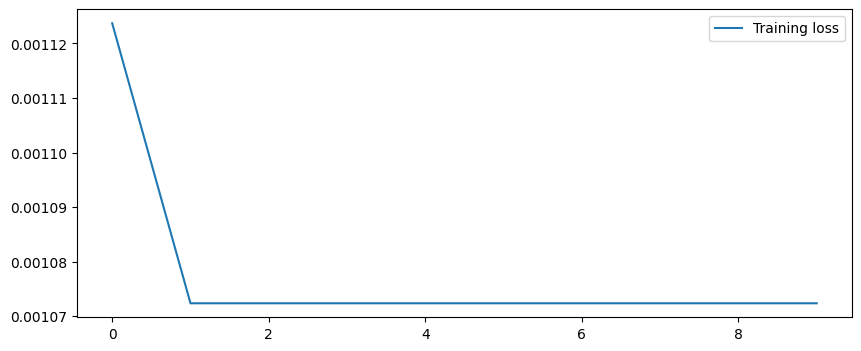

In [ ]:
from matplotlib import pyplot as plt

# epoch별 loss값
fig = plt.figure(figsize=(10, 4))
plt.plot(train_loss, label="Training loss")
plt.legend()
plt.show()

In [ ]:
# 모델 저장
PATH = "./Timeseries_LSTM_data.pth"
torch.save(model.state_dict(), PATH)

# 불러오기
model = Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model.load_state_dict(torch.load(PATH), strict=False)
model.eval()

Net(
  (lstm): LSTM(8, 1, batch_first=True)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

#Model test


In [ ]:
# 테스트
with torch.no_grad():
    pred = []
    for pr in range(len(testX_tensor)):
        model.reset_hidden_state()

        predicted = model(torch.unsqueeze(testX_tensor[pr], 0))
        predicted = torch.flatten(predicted).item()
        pred.append(predicted)

    # normalized data -> original (tuned)
    pred_inverse = scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse = scaler_y.inverse_transform(testY_tensor)


# MAE metric 측정
def MAE(true, pred):
    return np.mean(np.abs(true - pred))


print("MAE SCORE : ", MAE(pred_inverse, testY_inverse))

MAE SCORE :  27.977814819001456


In [ ]:
print(testY_inverse[0:662])
print(pred_inverse[0:662])

[[36.9816584 ]
 [36.93300612]
 [36.88442927]
 [36.83592204]
 [36.78748734]
 [36.73912227]
 [36.69083263]
 [36.64261262]
 [36.59446514]
 [36.54639019]
 [36.49838486]
 [36.45045206]
 [36.40258889]
 [36.35479825]
 [36.30708013]
 [36.25942875]
 [36.21184989]
 [36.16434356]
 [36.11690396]
 [36.06953688]
 [36.02224234]
 [35.97501452]
 [35.92785923]
 [35.88077067]
 [35.83375463]
 [35.78680823]
 [35.73993145]
 [35.69312139]
 [35.64638387]
 [35.59971597]
 [35.5531148 ]
 [35.50658326]
 [35.46012134]
 [35.41372906]
 [35.36740349]
 [35.32114756]
 [35.27496125]
 [35.22884168]
 [35.18279172]
 [35.1368085 ]
 [35.0908949 ]
 [35.04504803]
 [34.99927079]
 [34.95356027]
 [34.90791648]
 [34.86234231]
 [34.81683488]
 [34.77139417]
 [34.72602018]
 [34.68071583]
 [34.63547529]
 [34.59030439]
 [34.54520021]
 [34.50015986]
 [34.45518914]
 [34.41028514]
 [34.36544497]
 [34.32067152]
 [34.2759648 ]
 [34.23132481]
 [34.18675154]
 [34.1422421 ]
 [34.09779939]
 [34.0534234 ]
 [34.00911414]
 [33.9648658 ]
 [33.92068

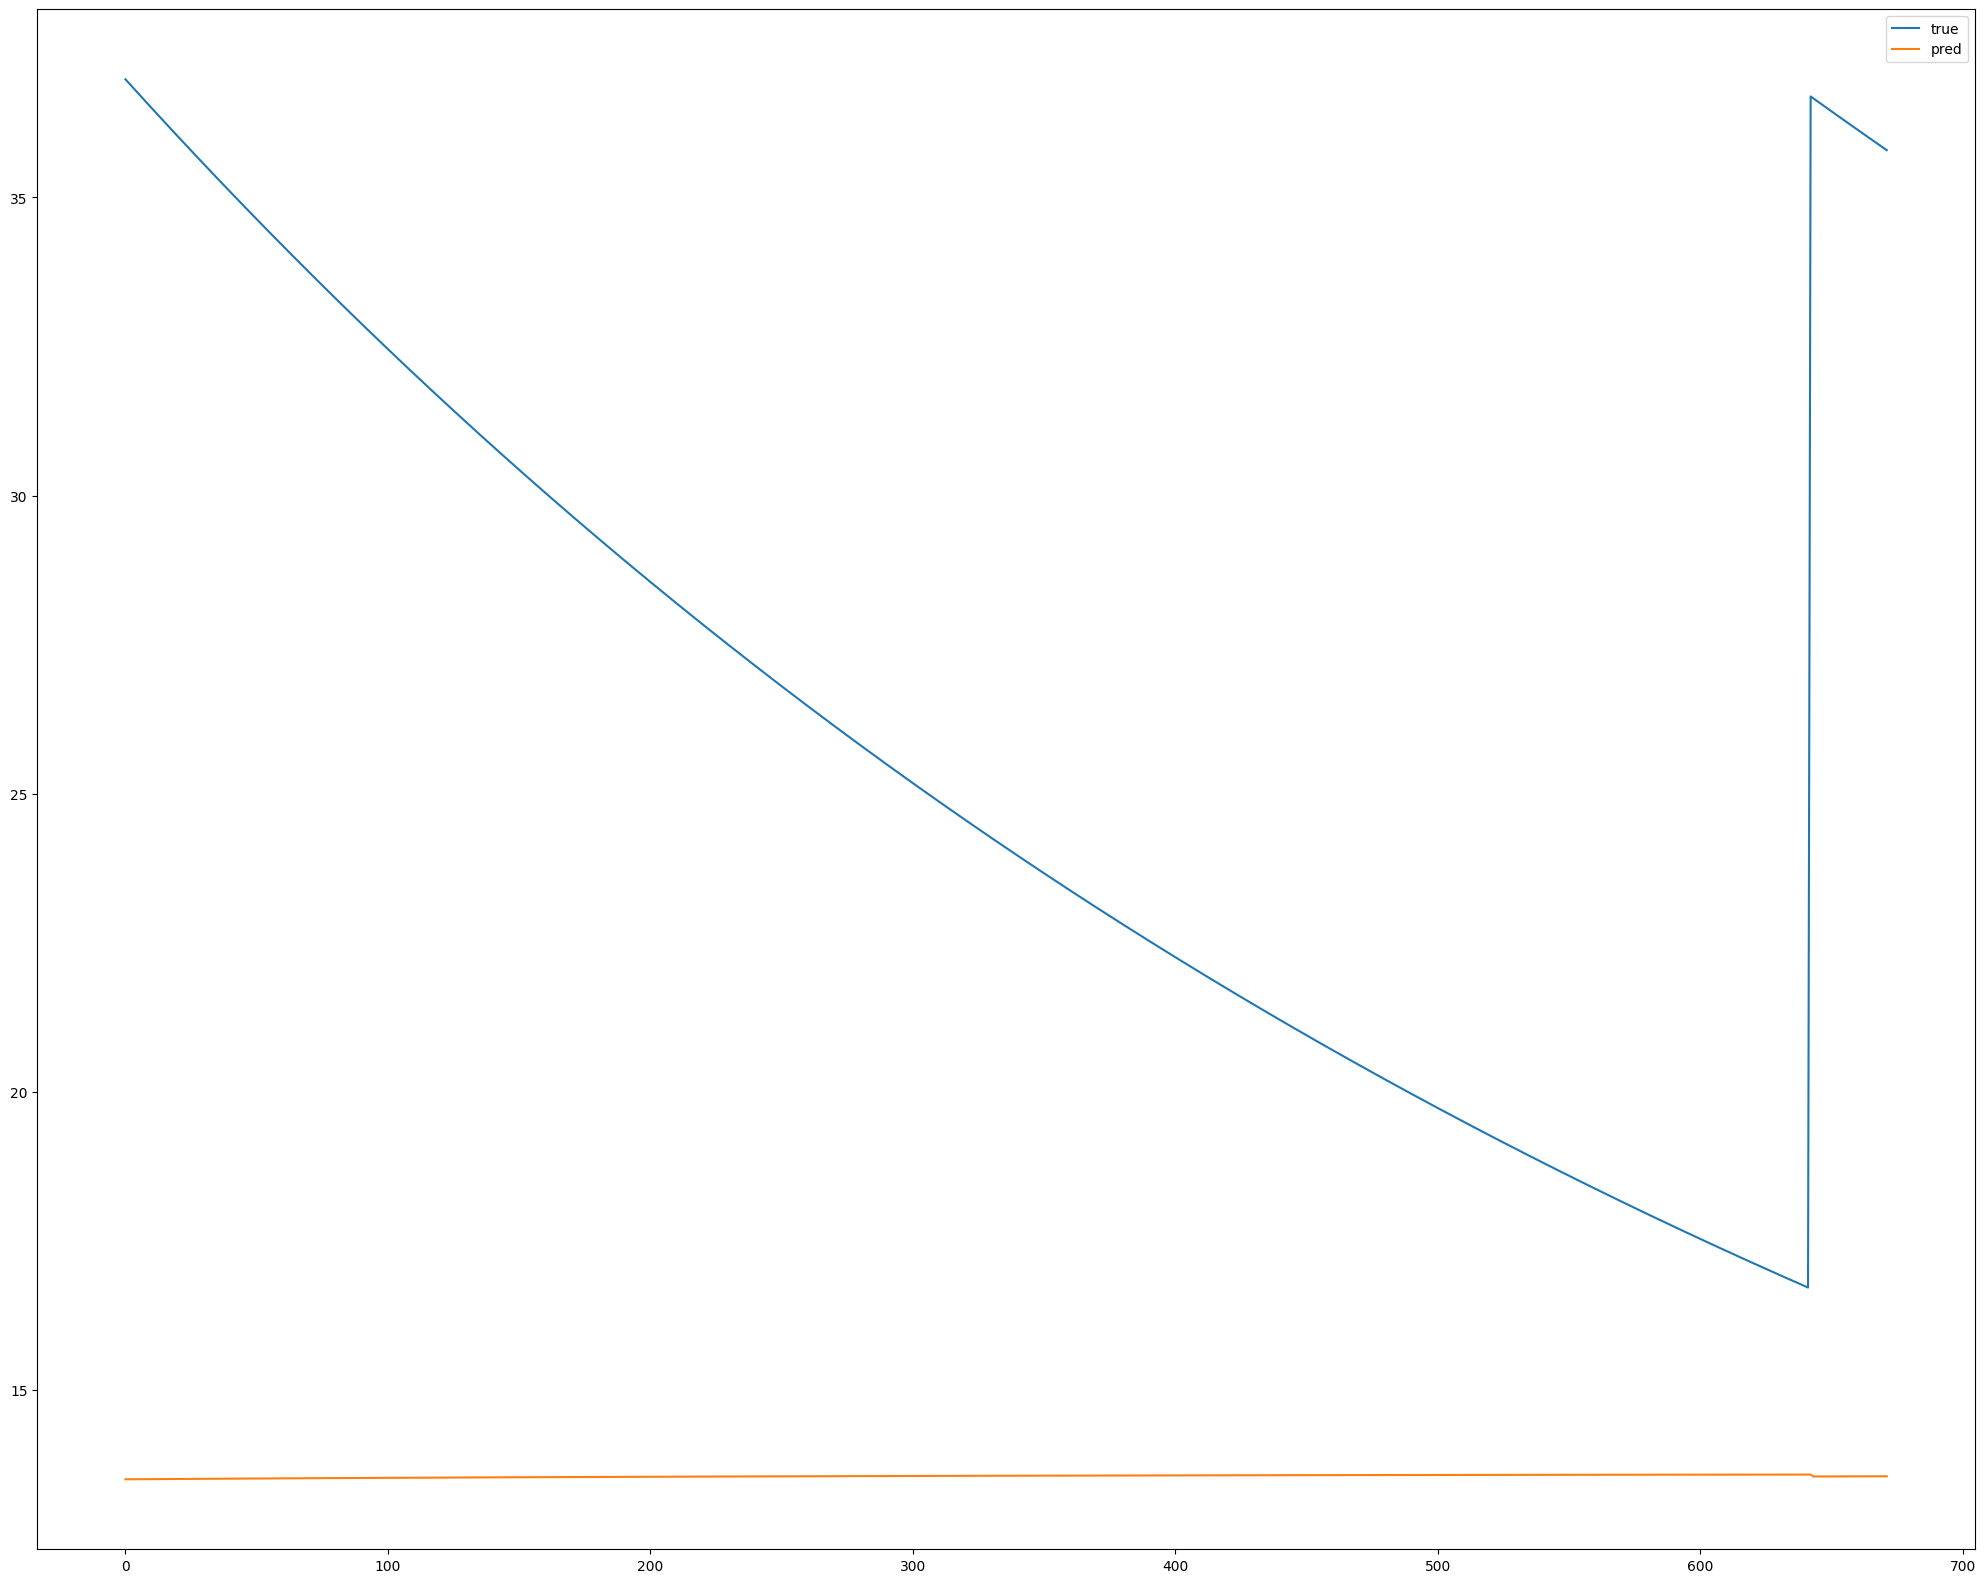

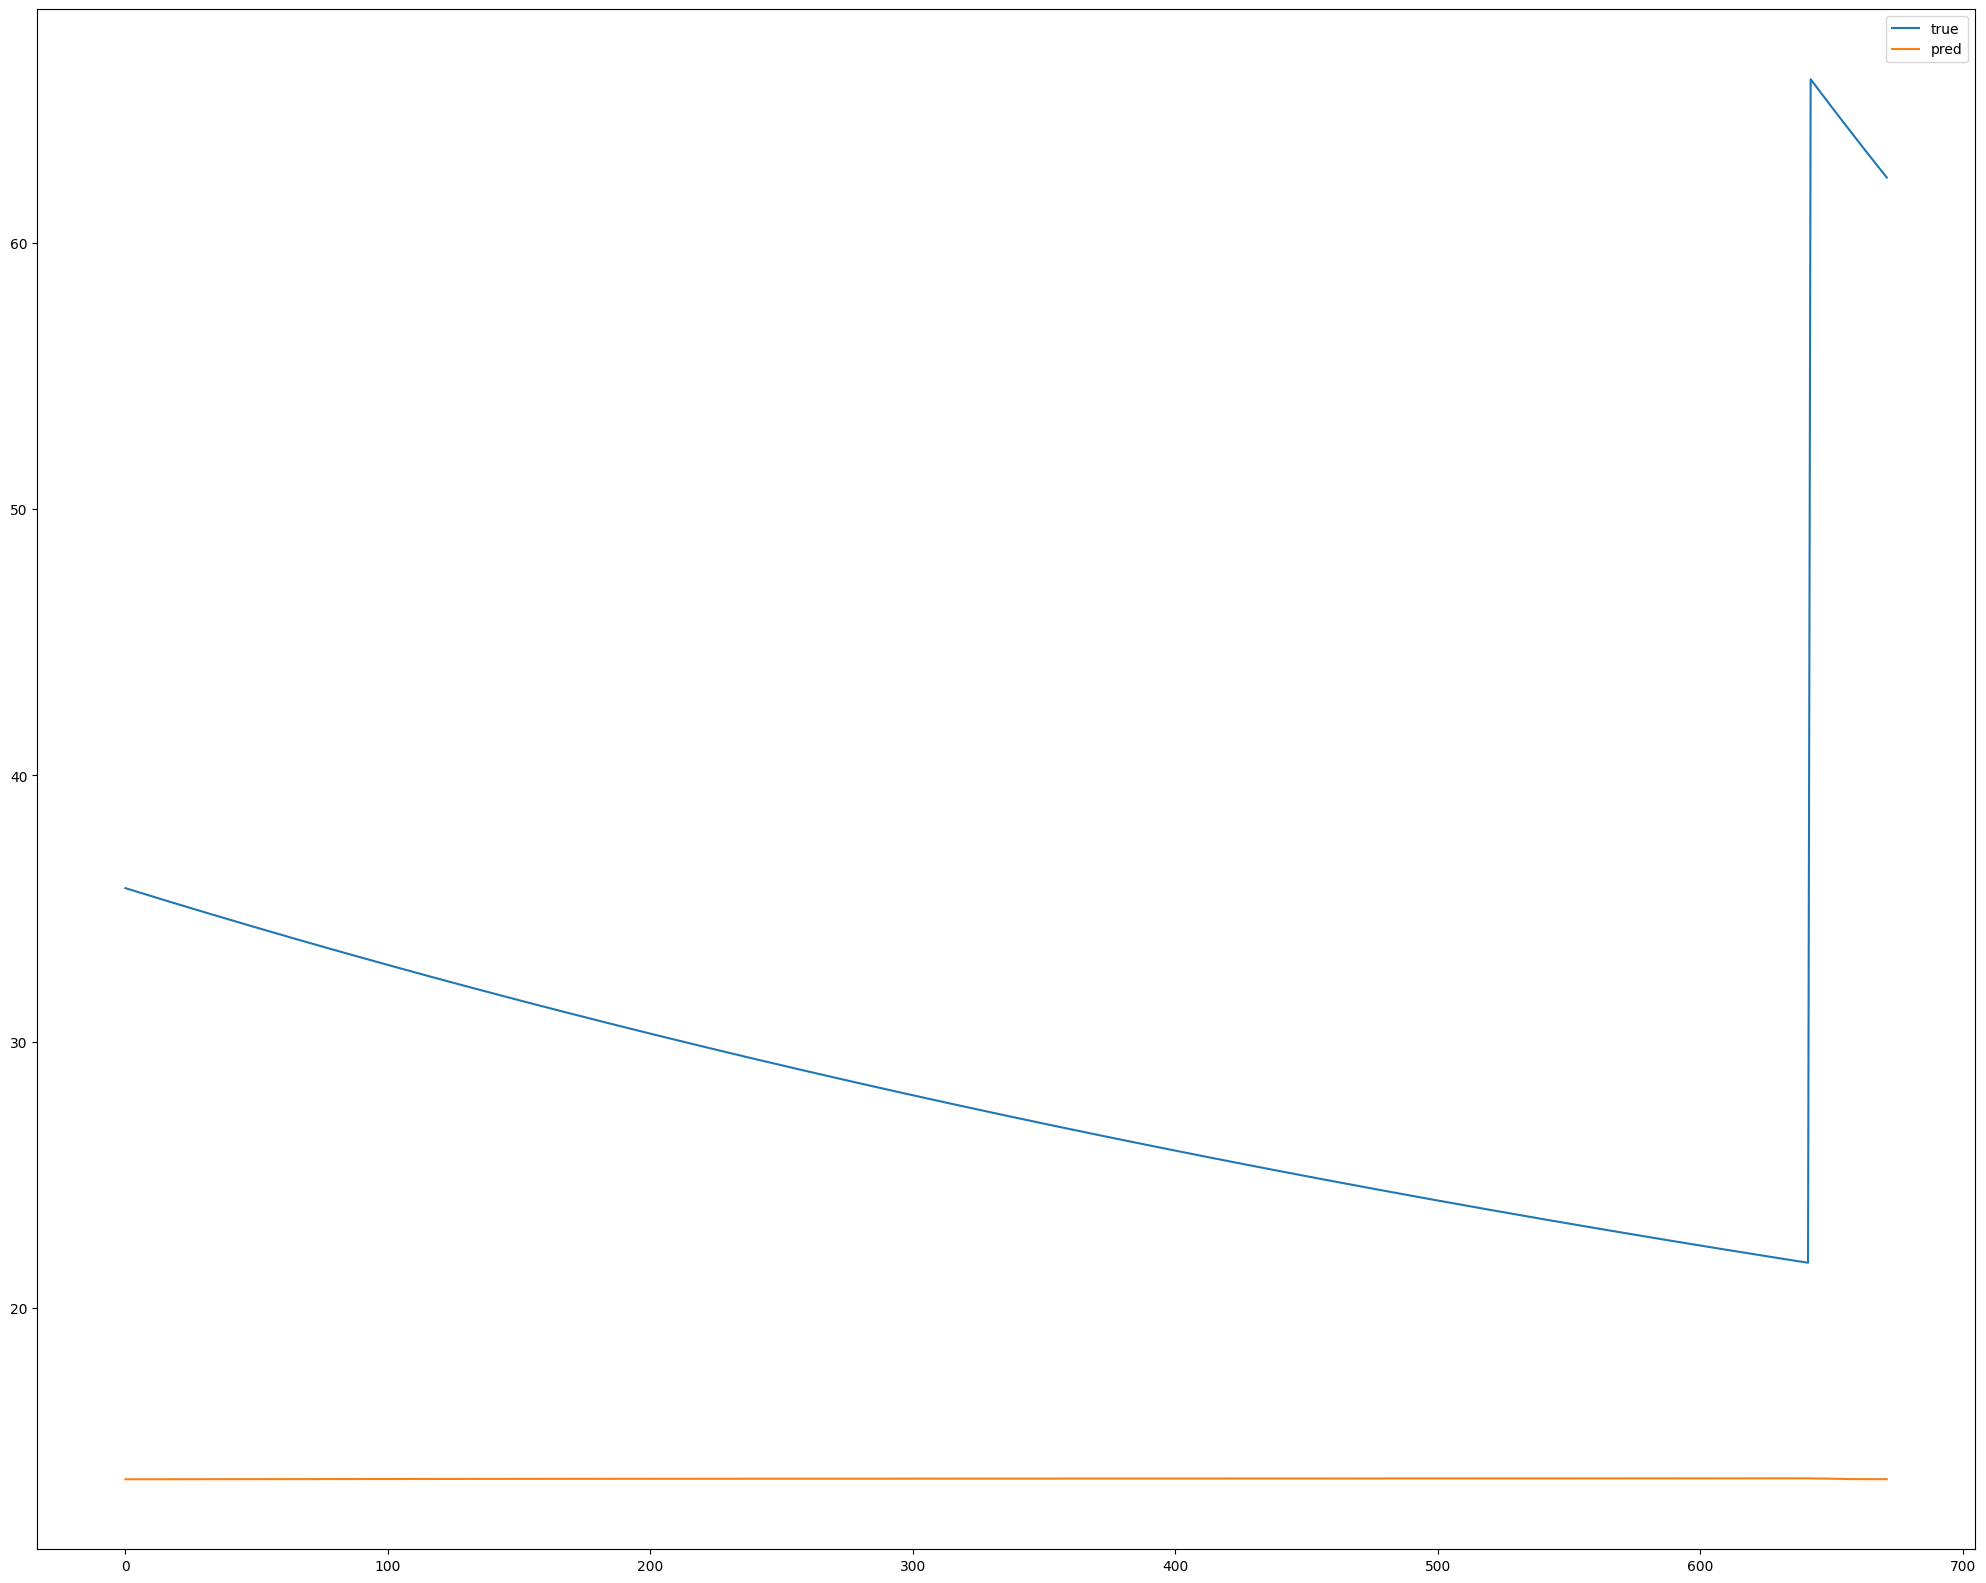

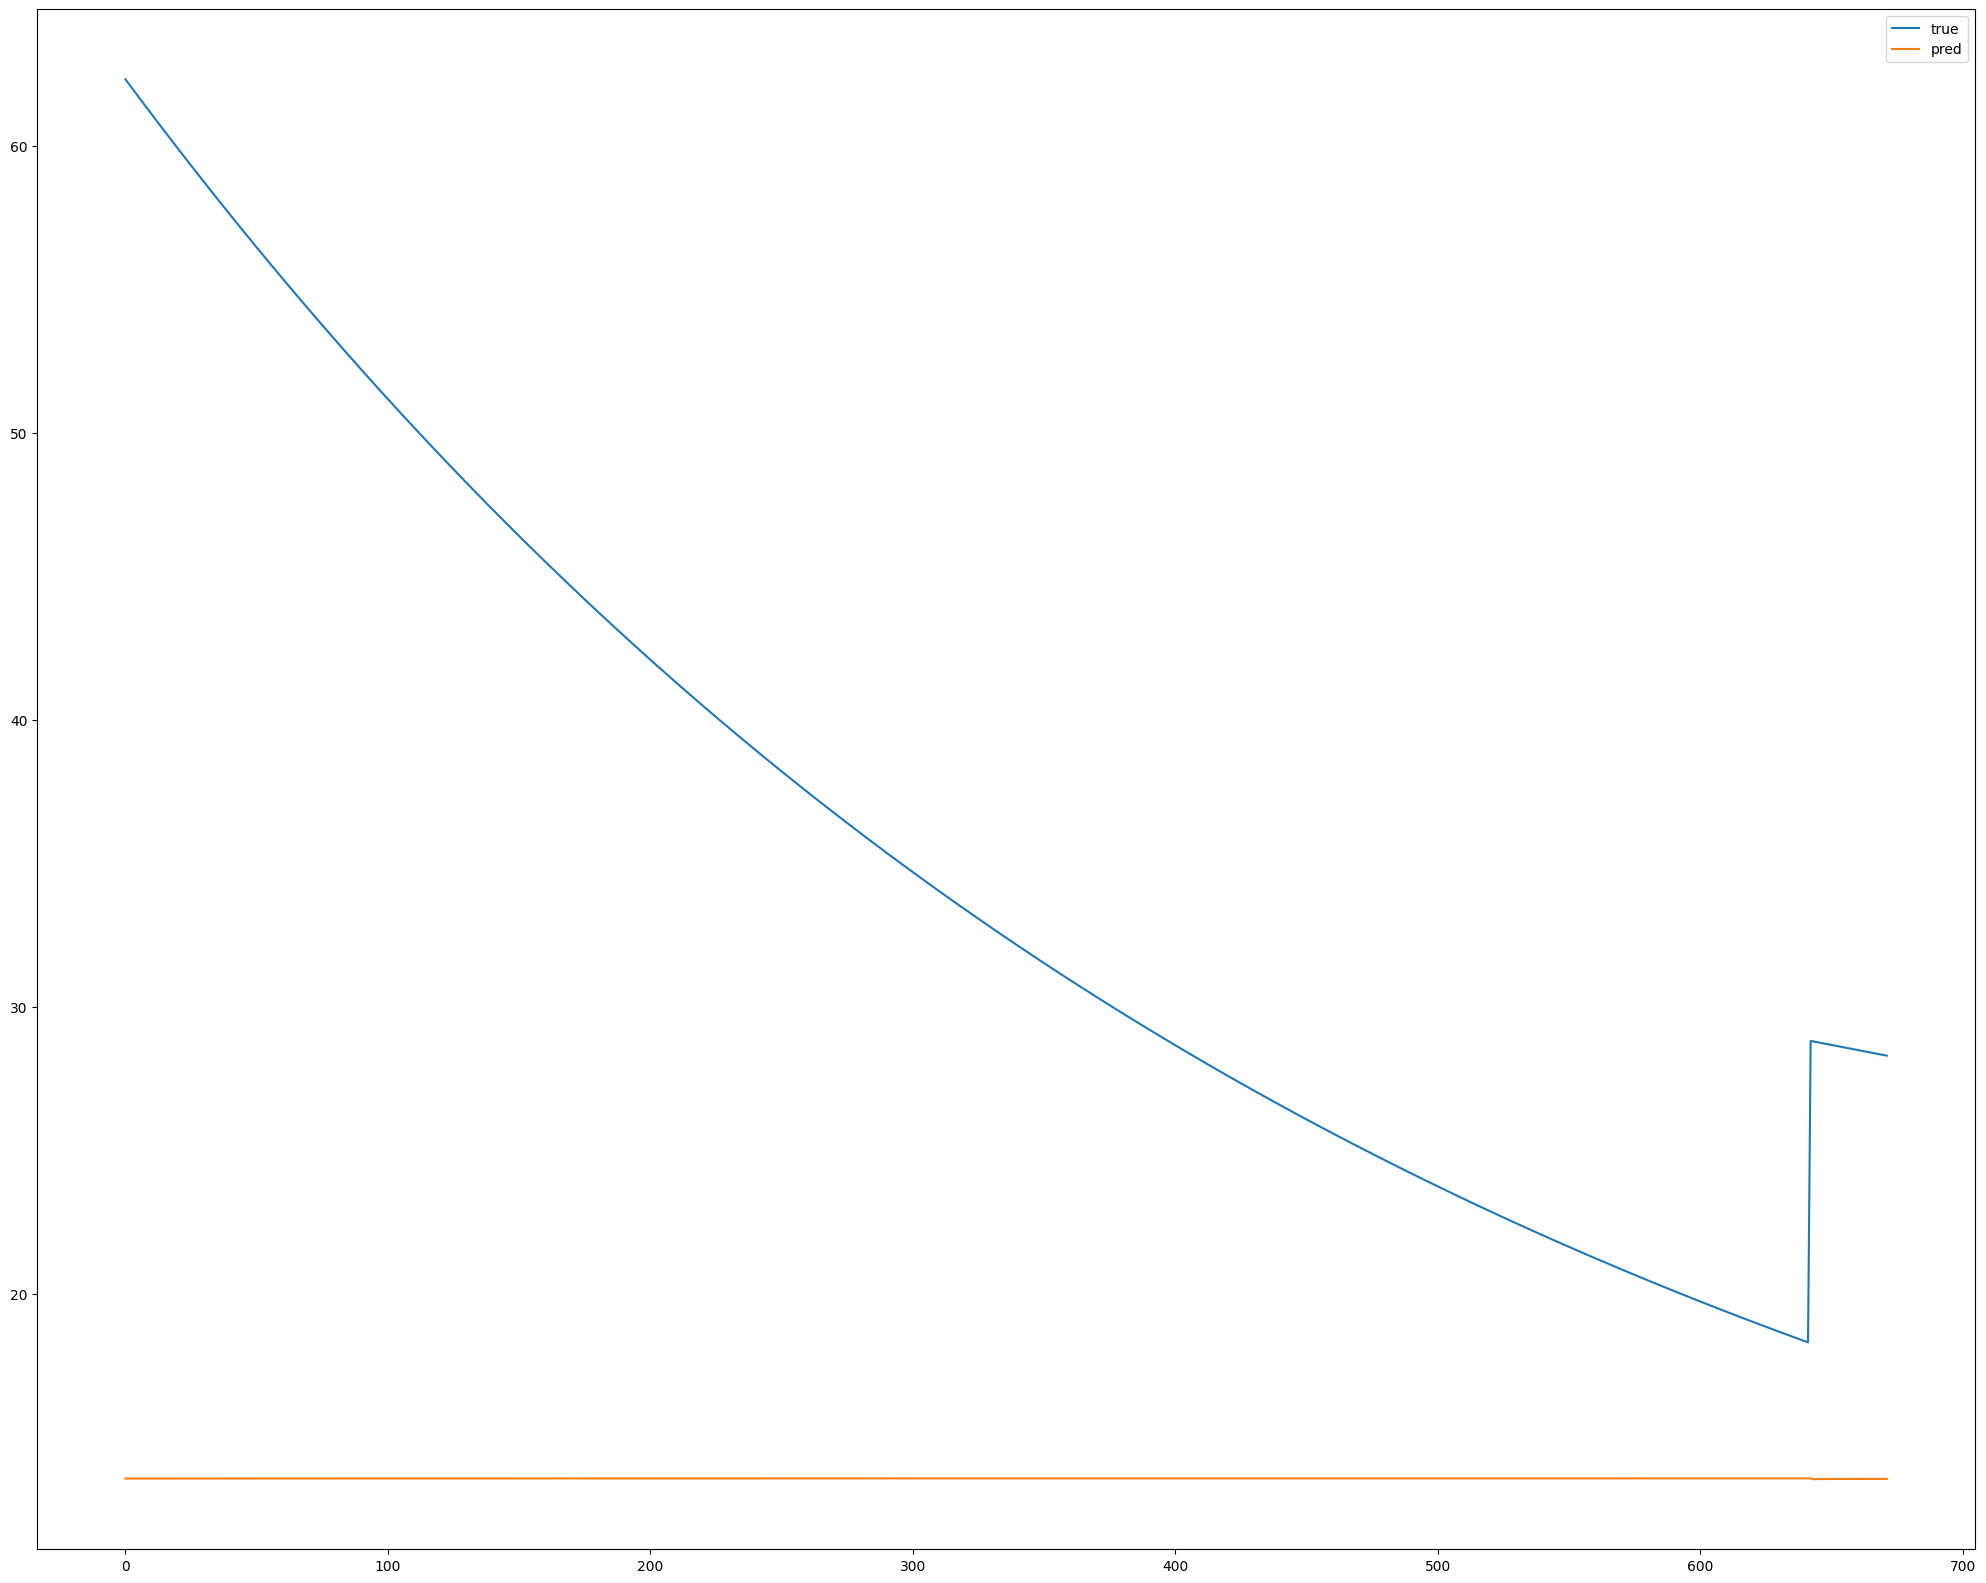

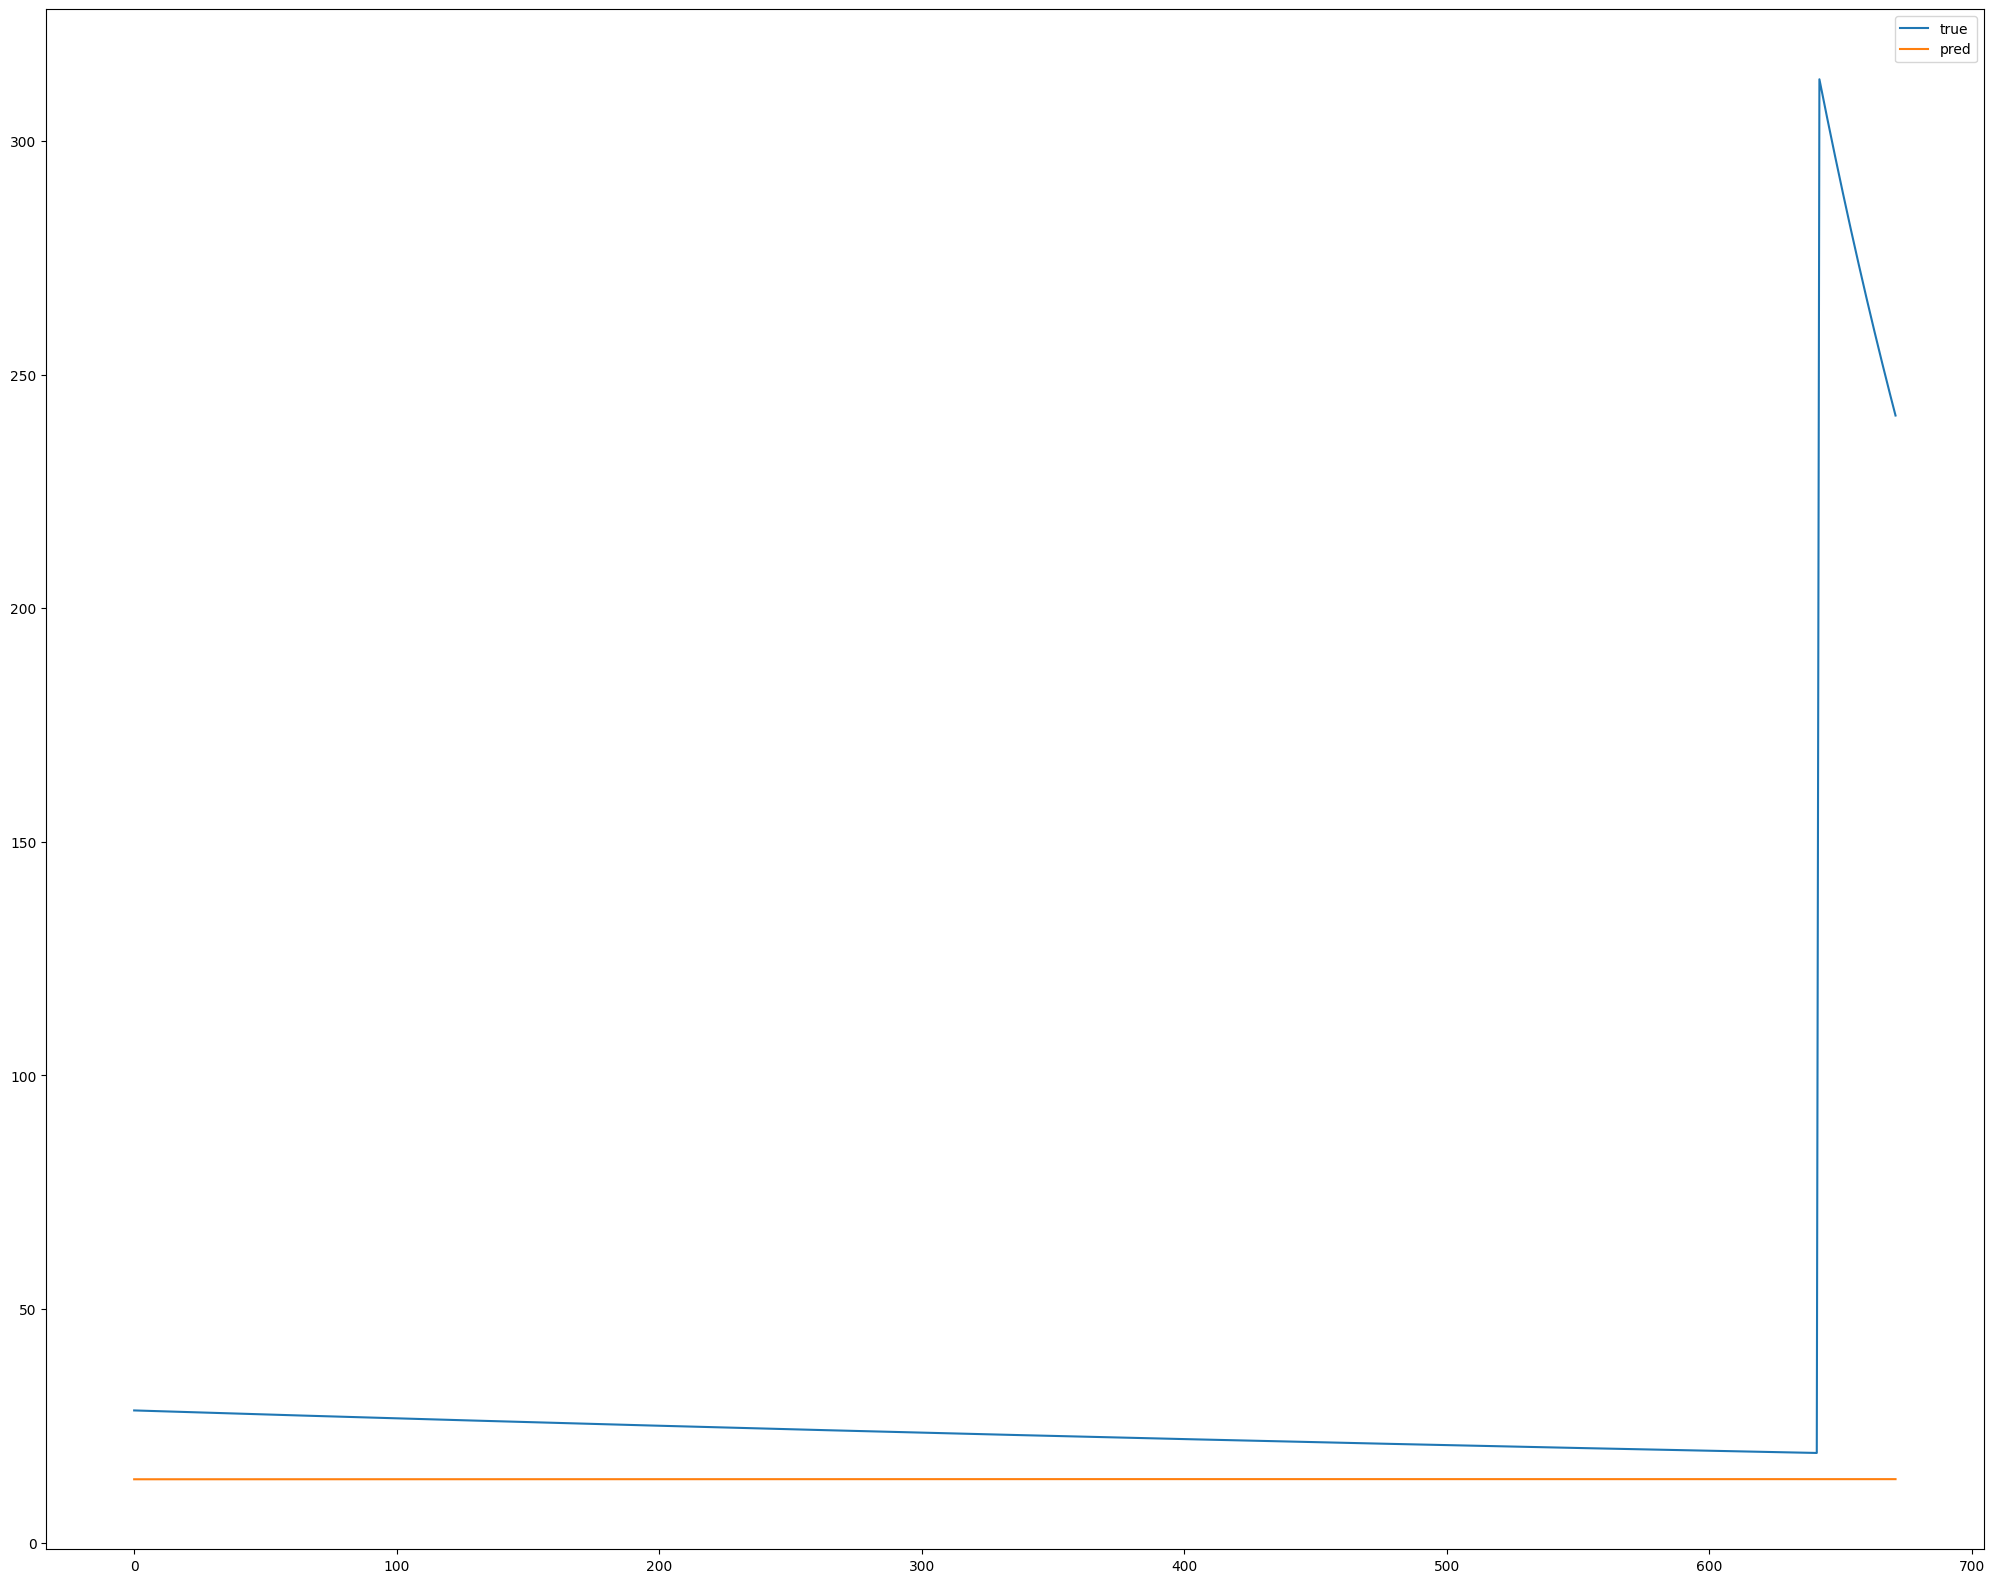

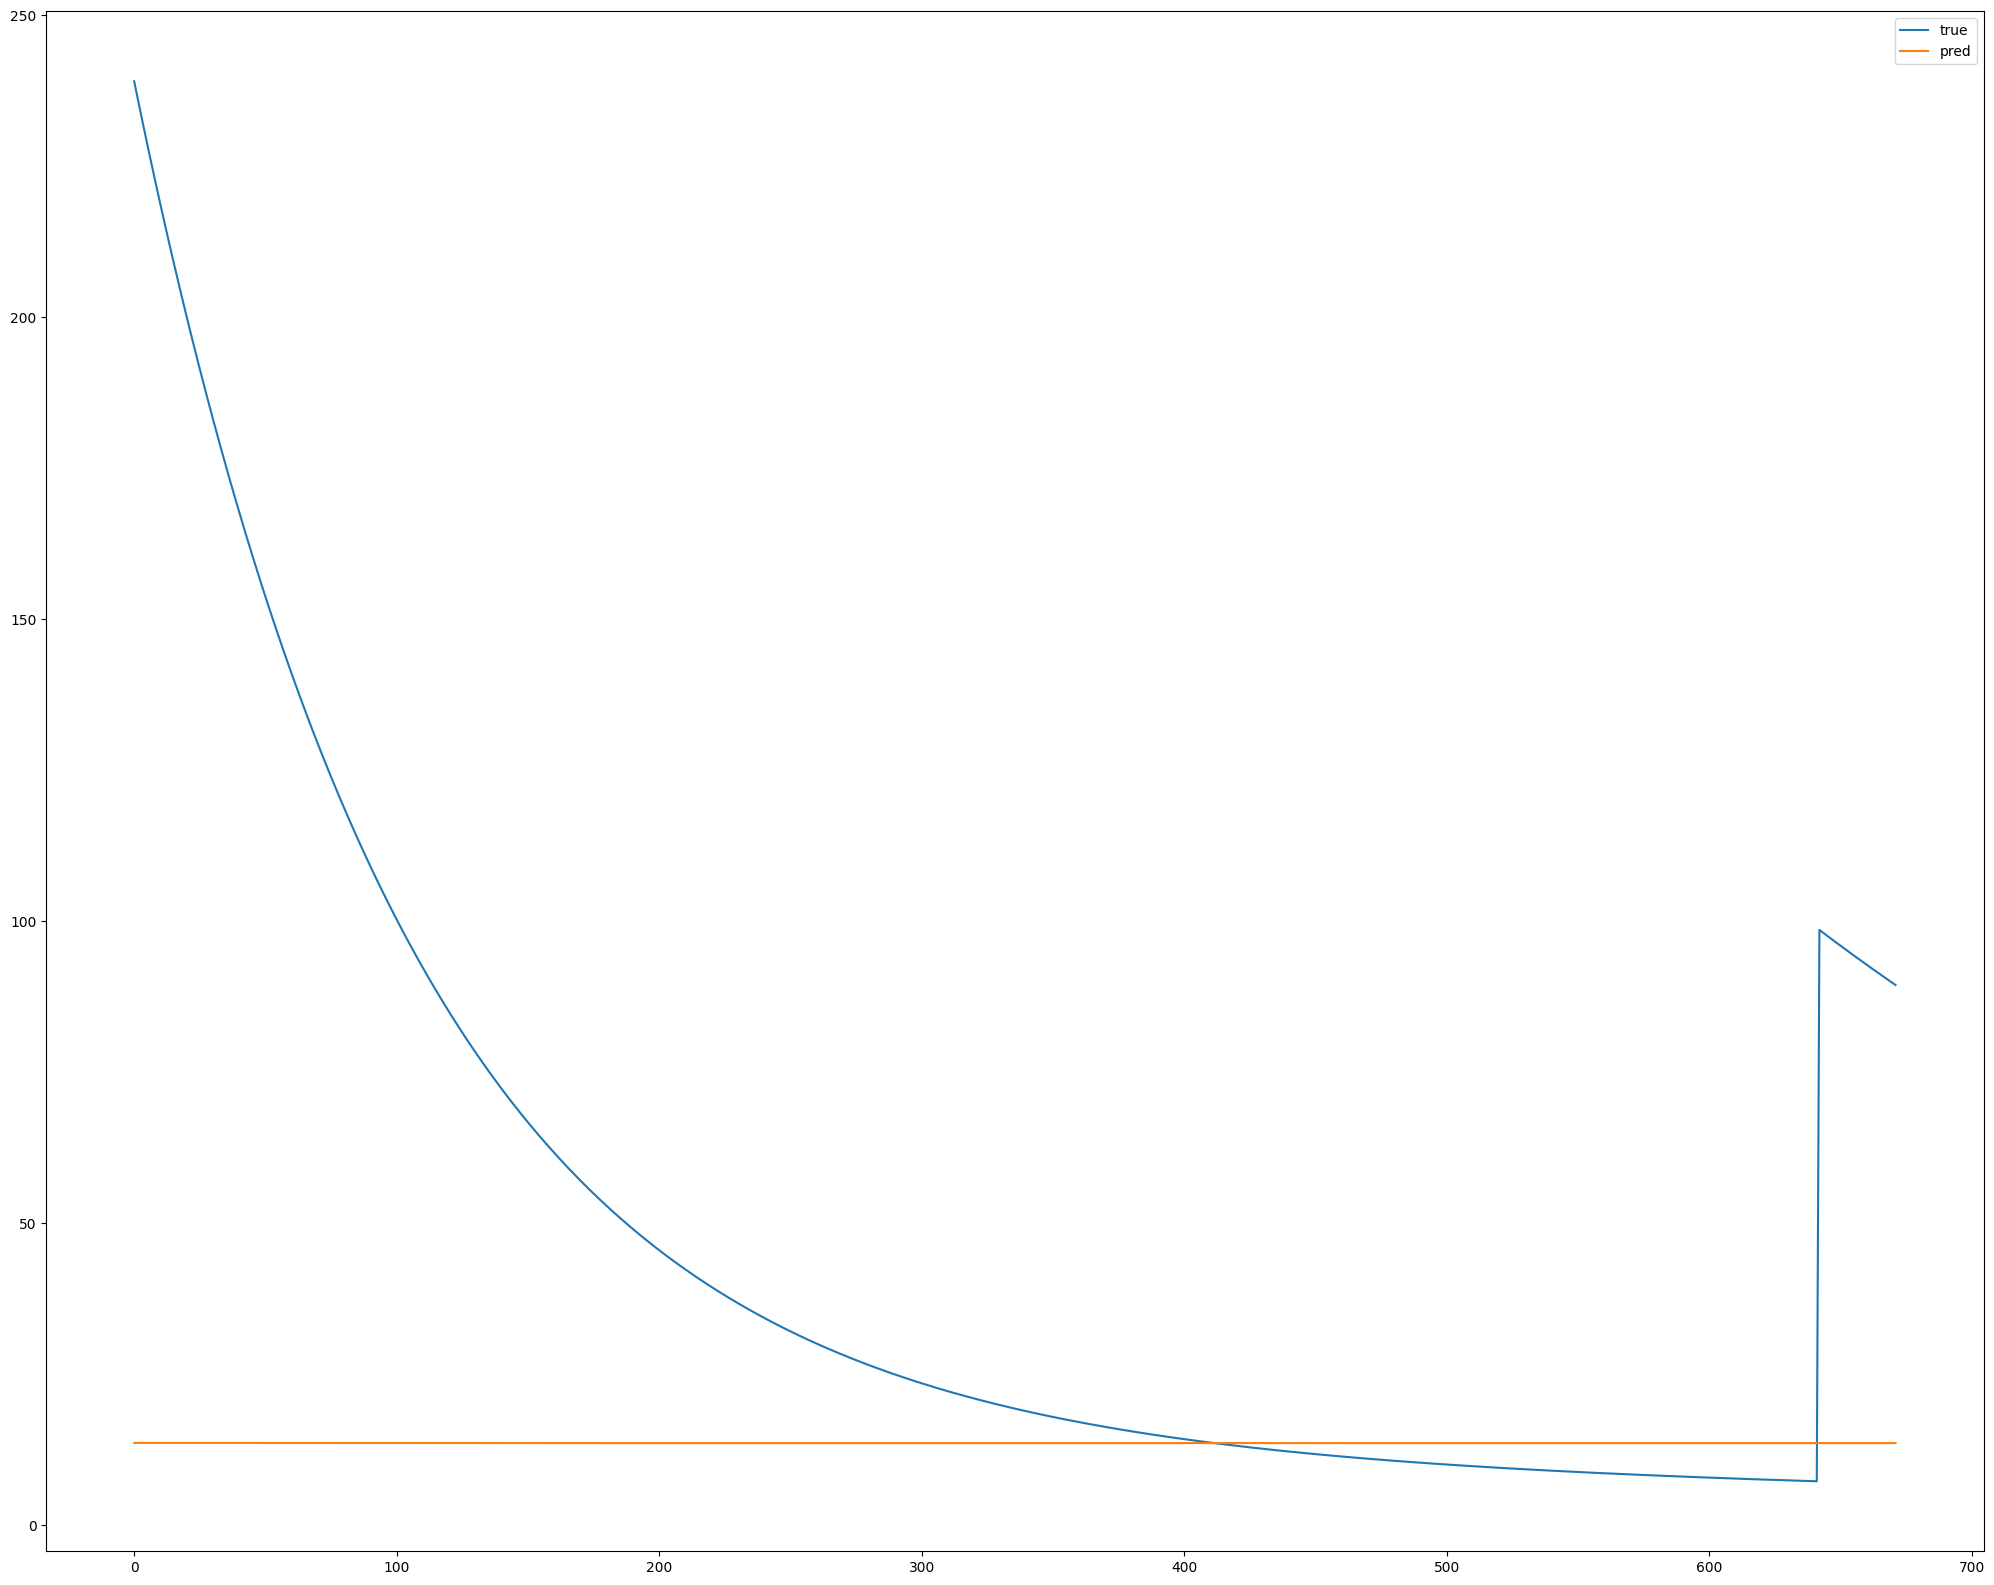

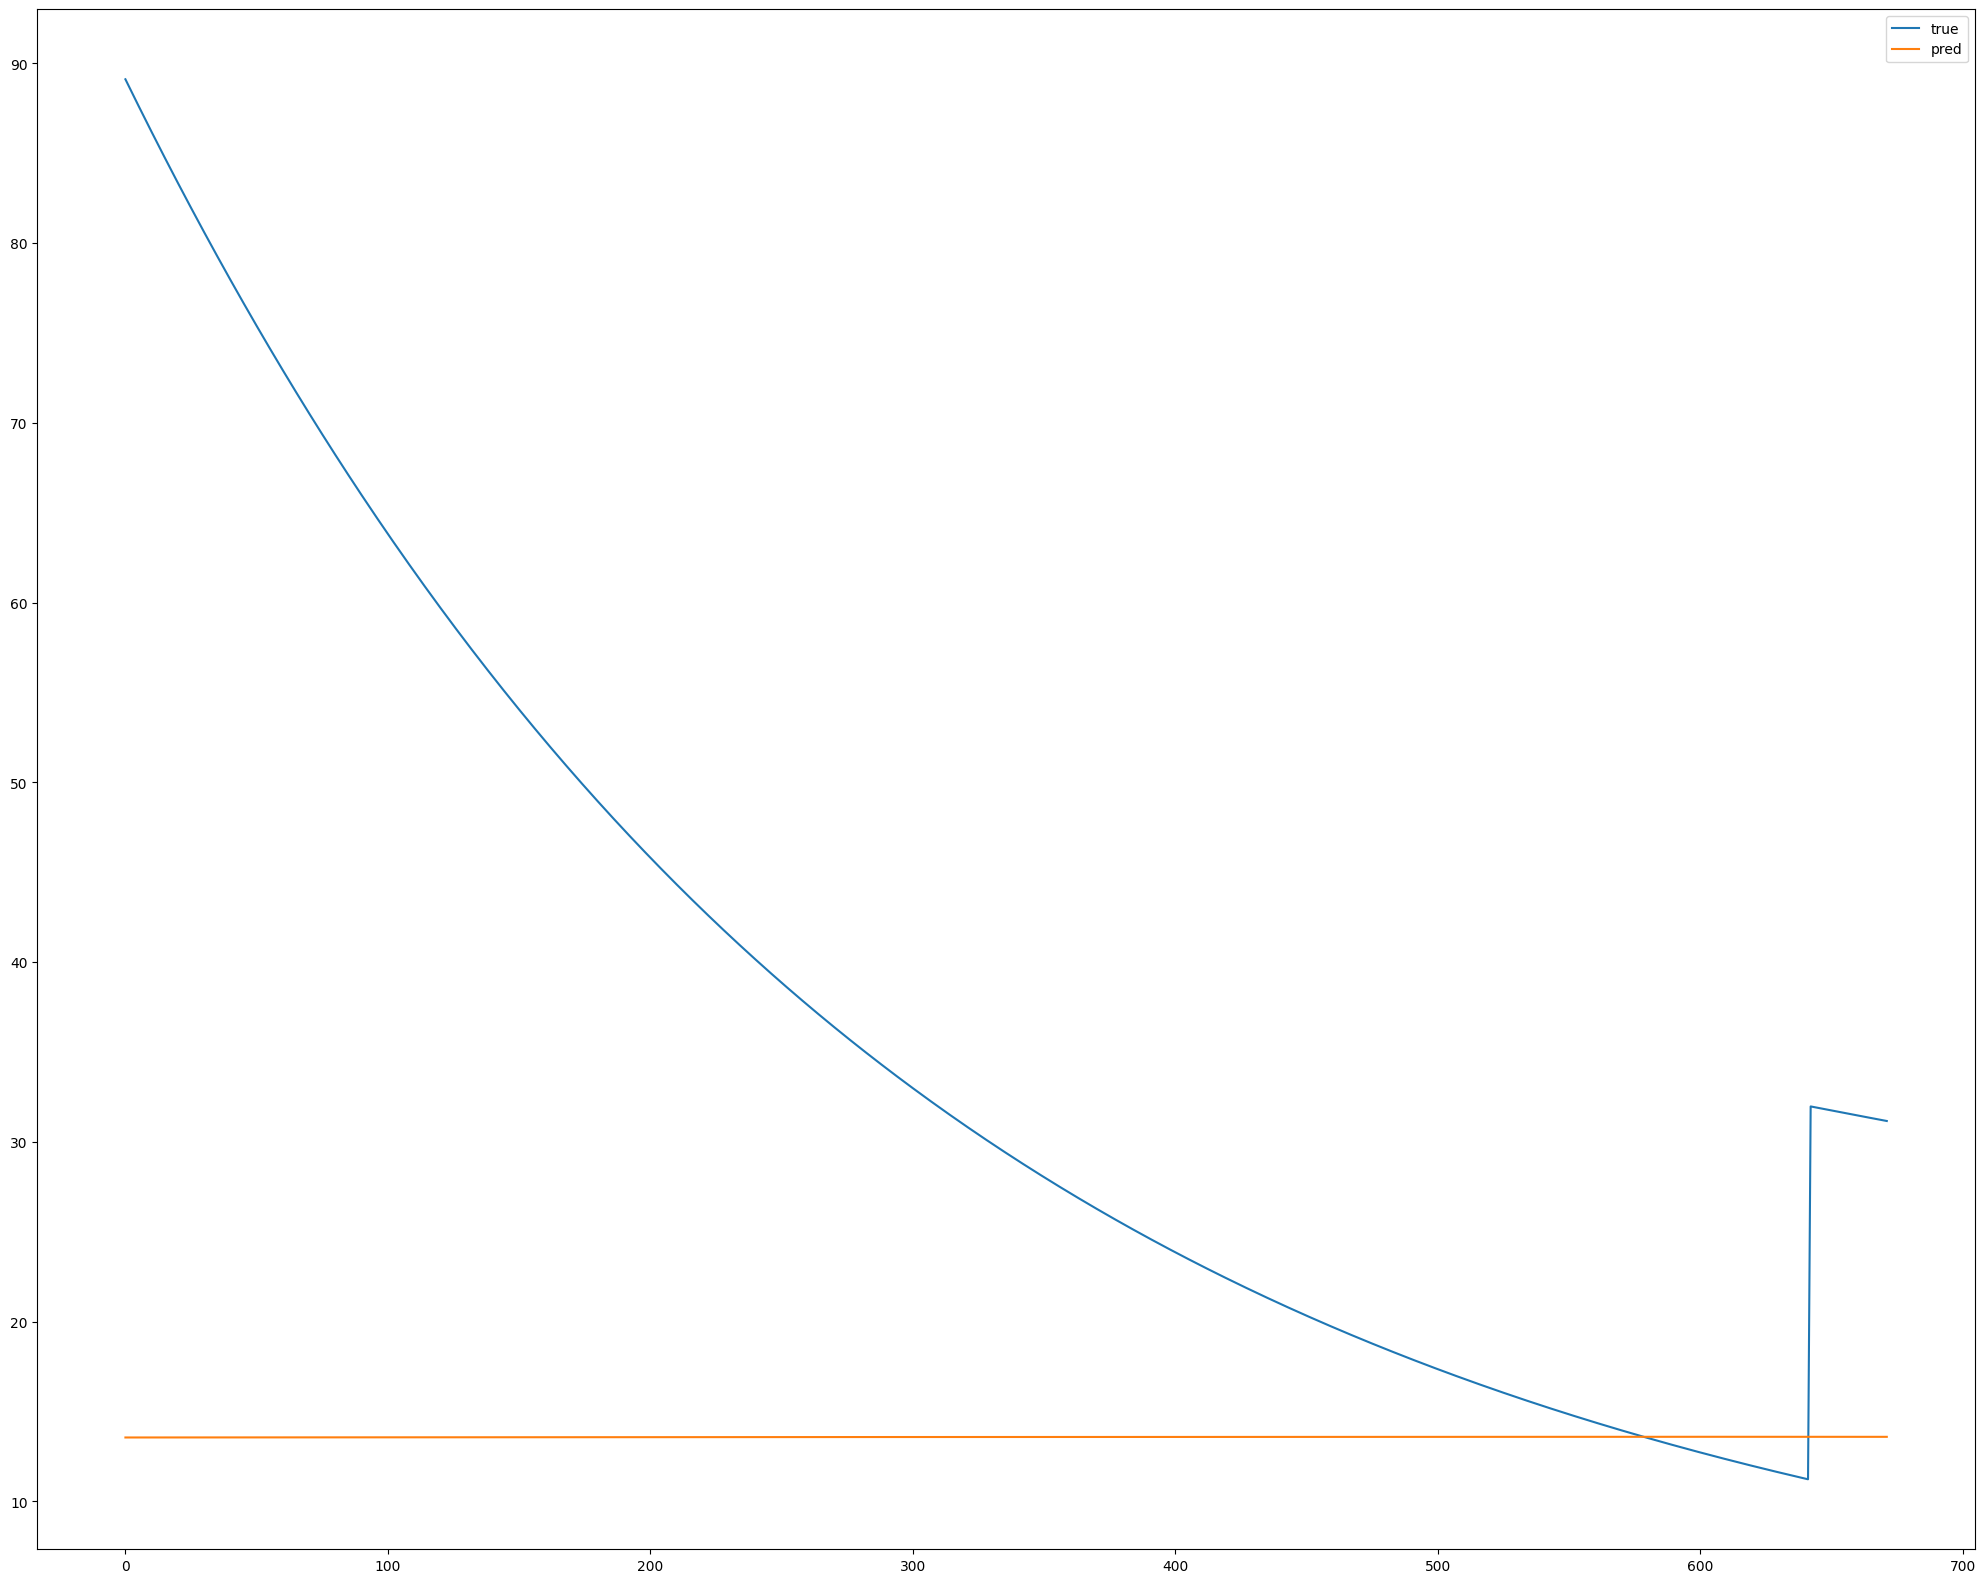

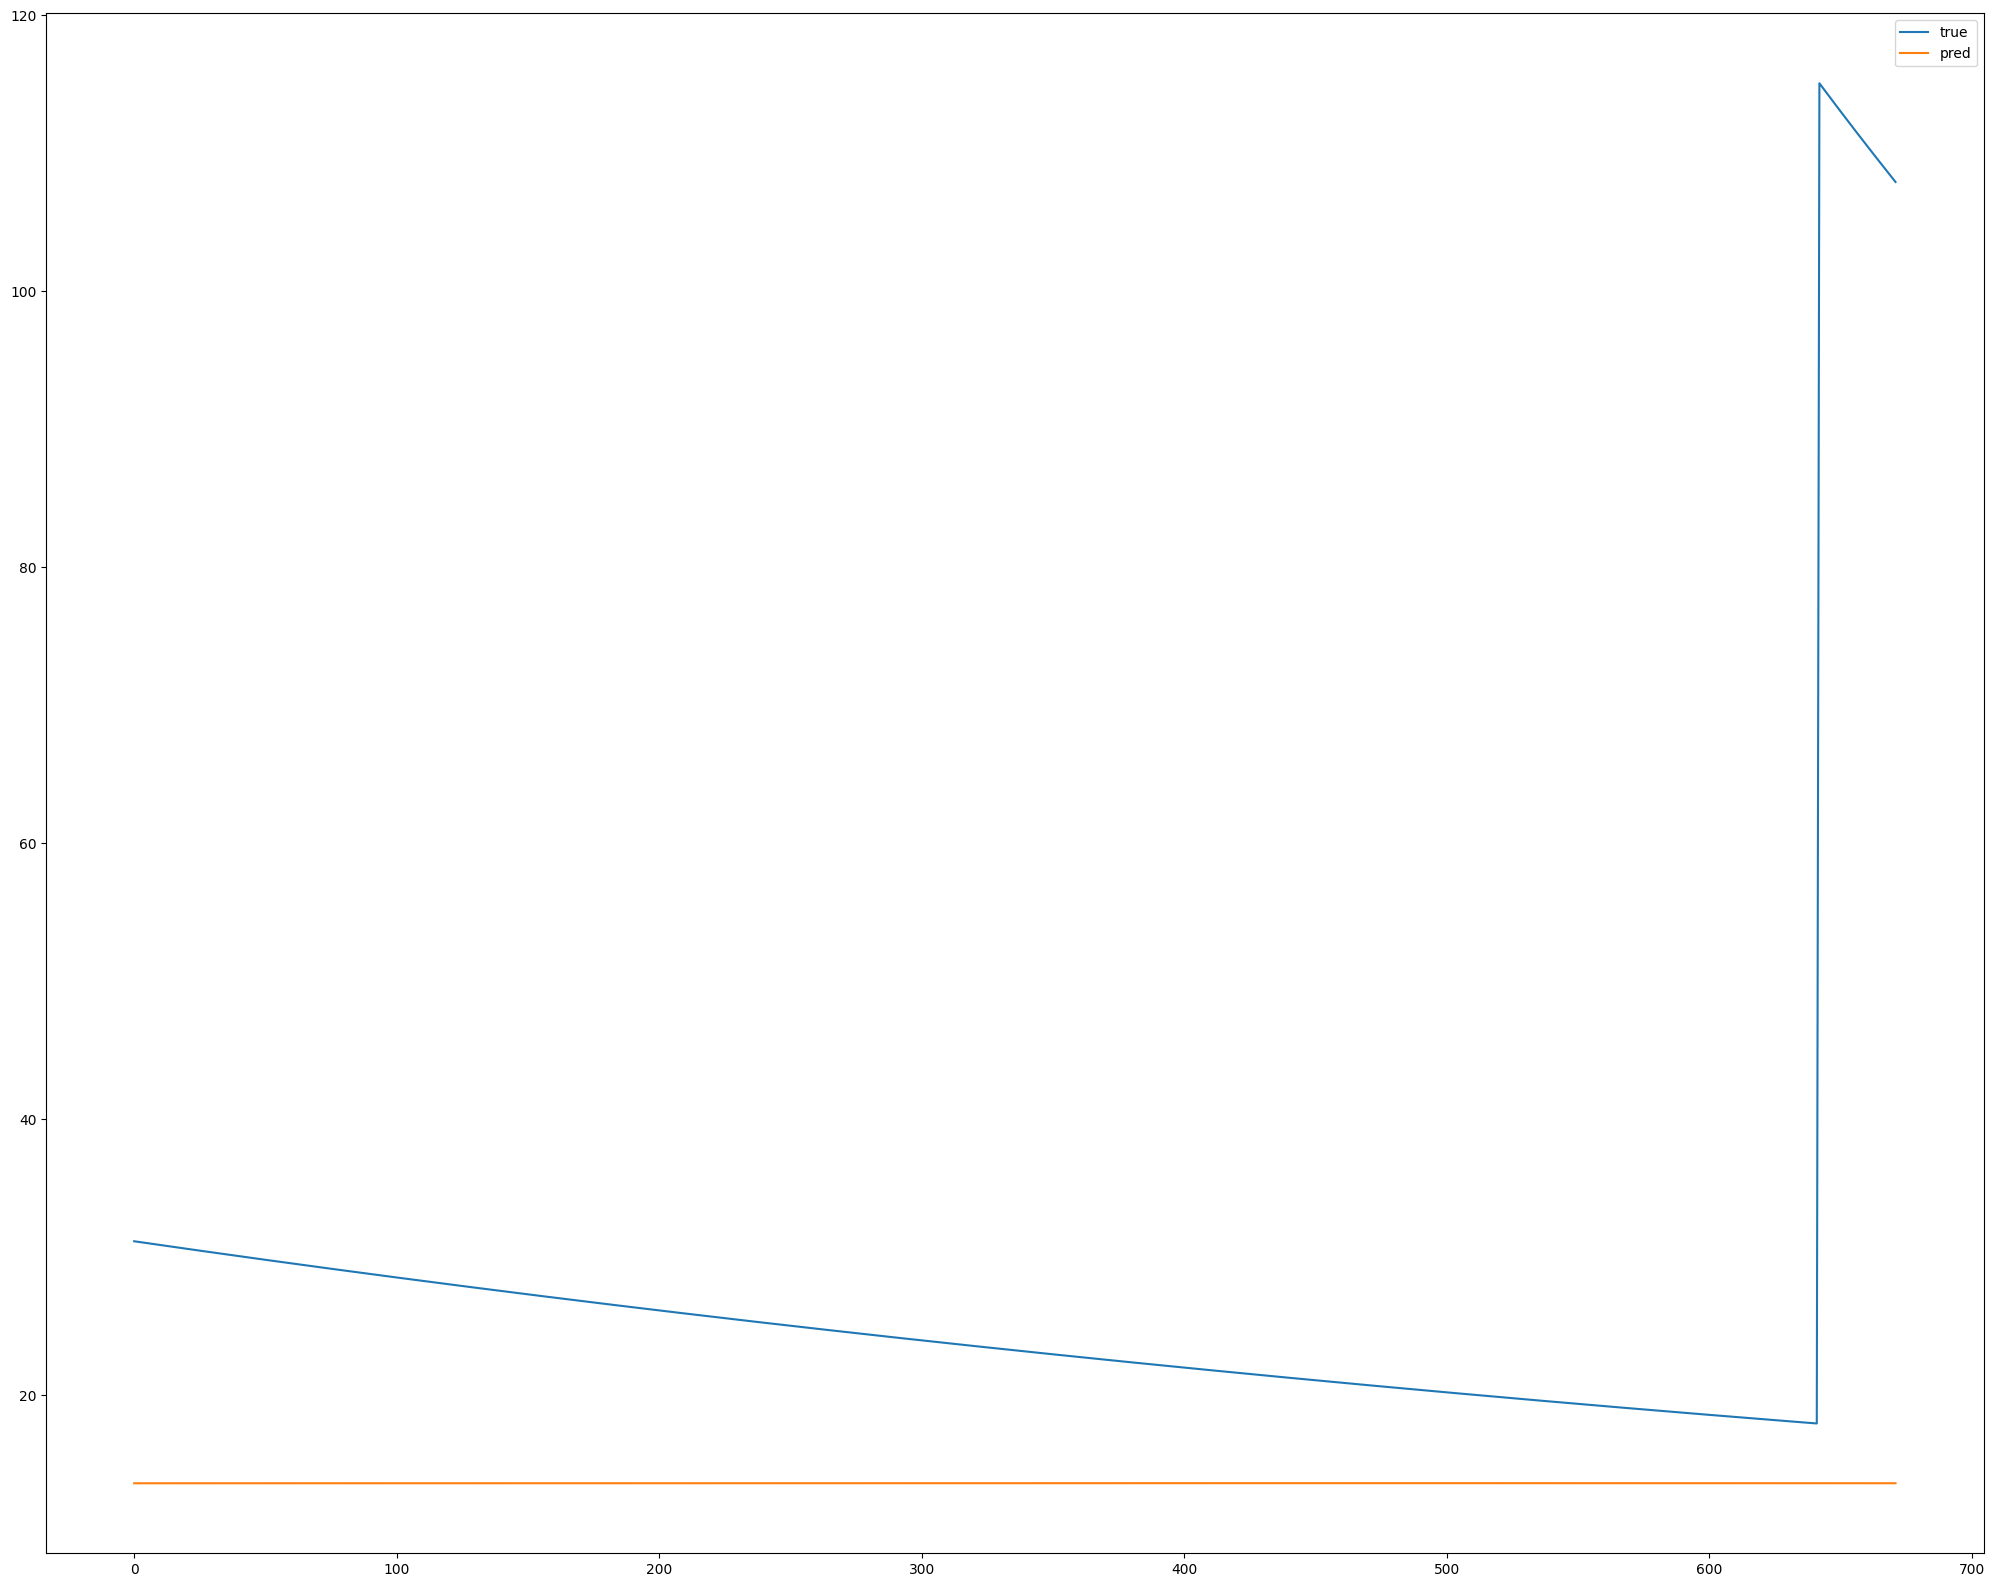

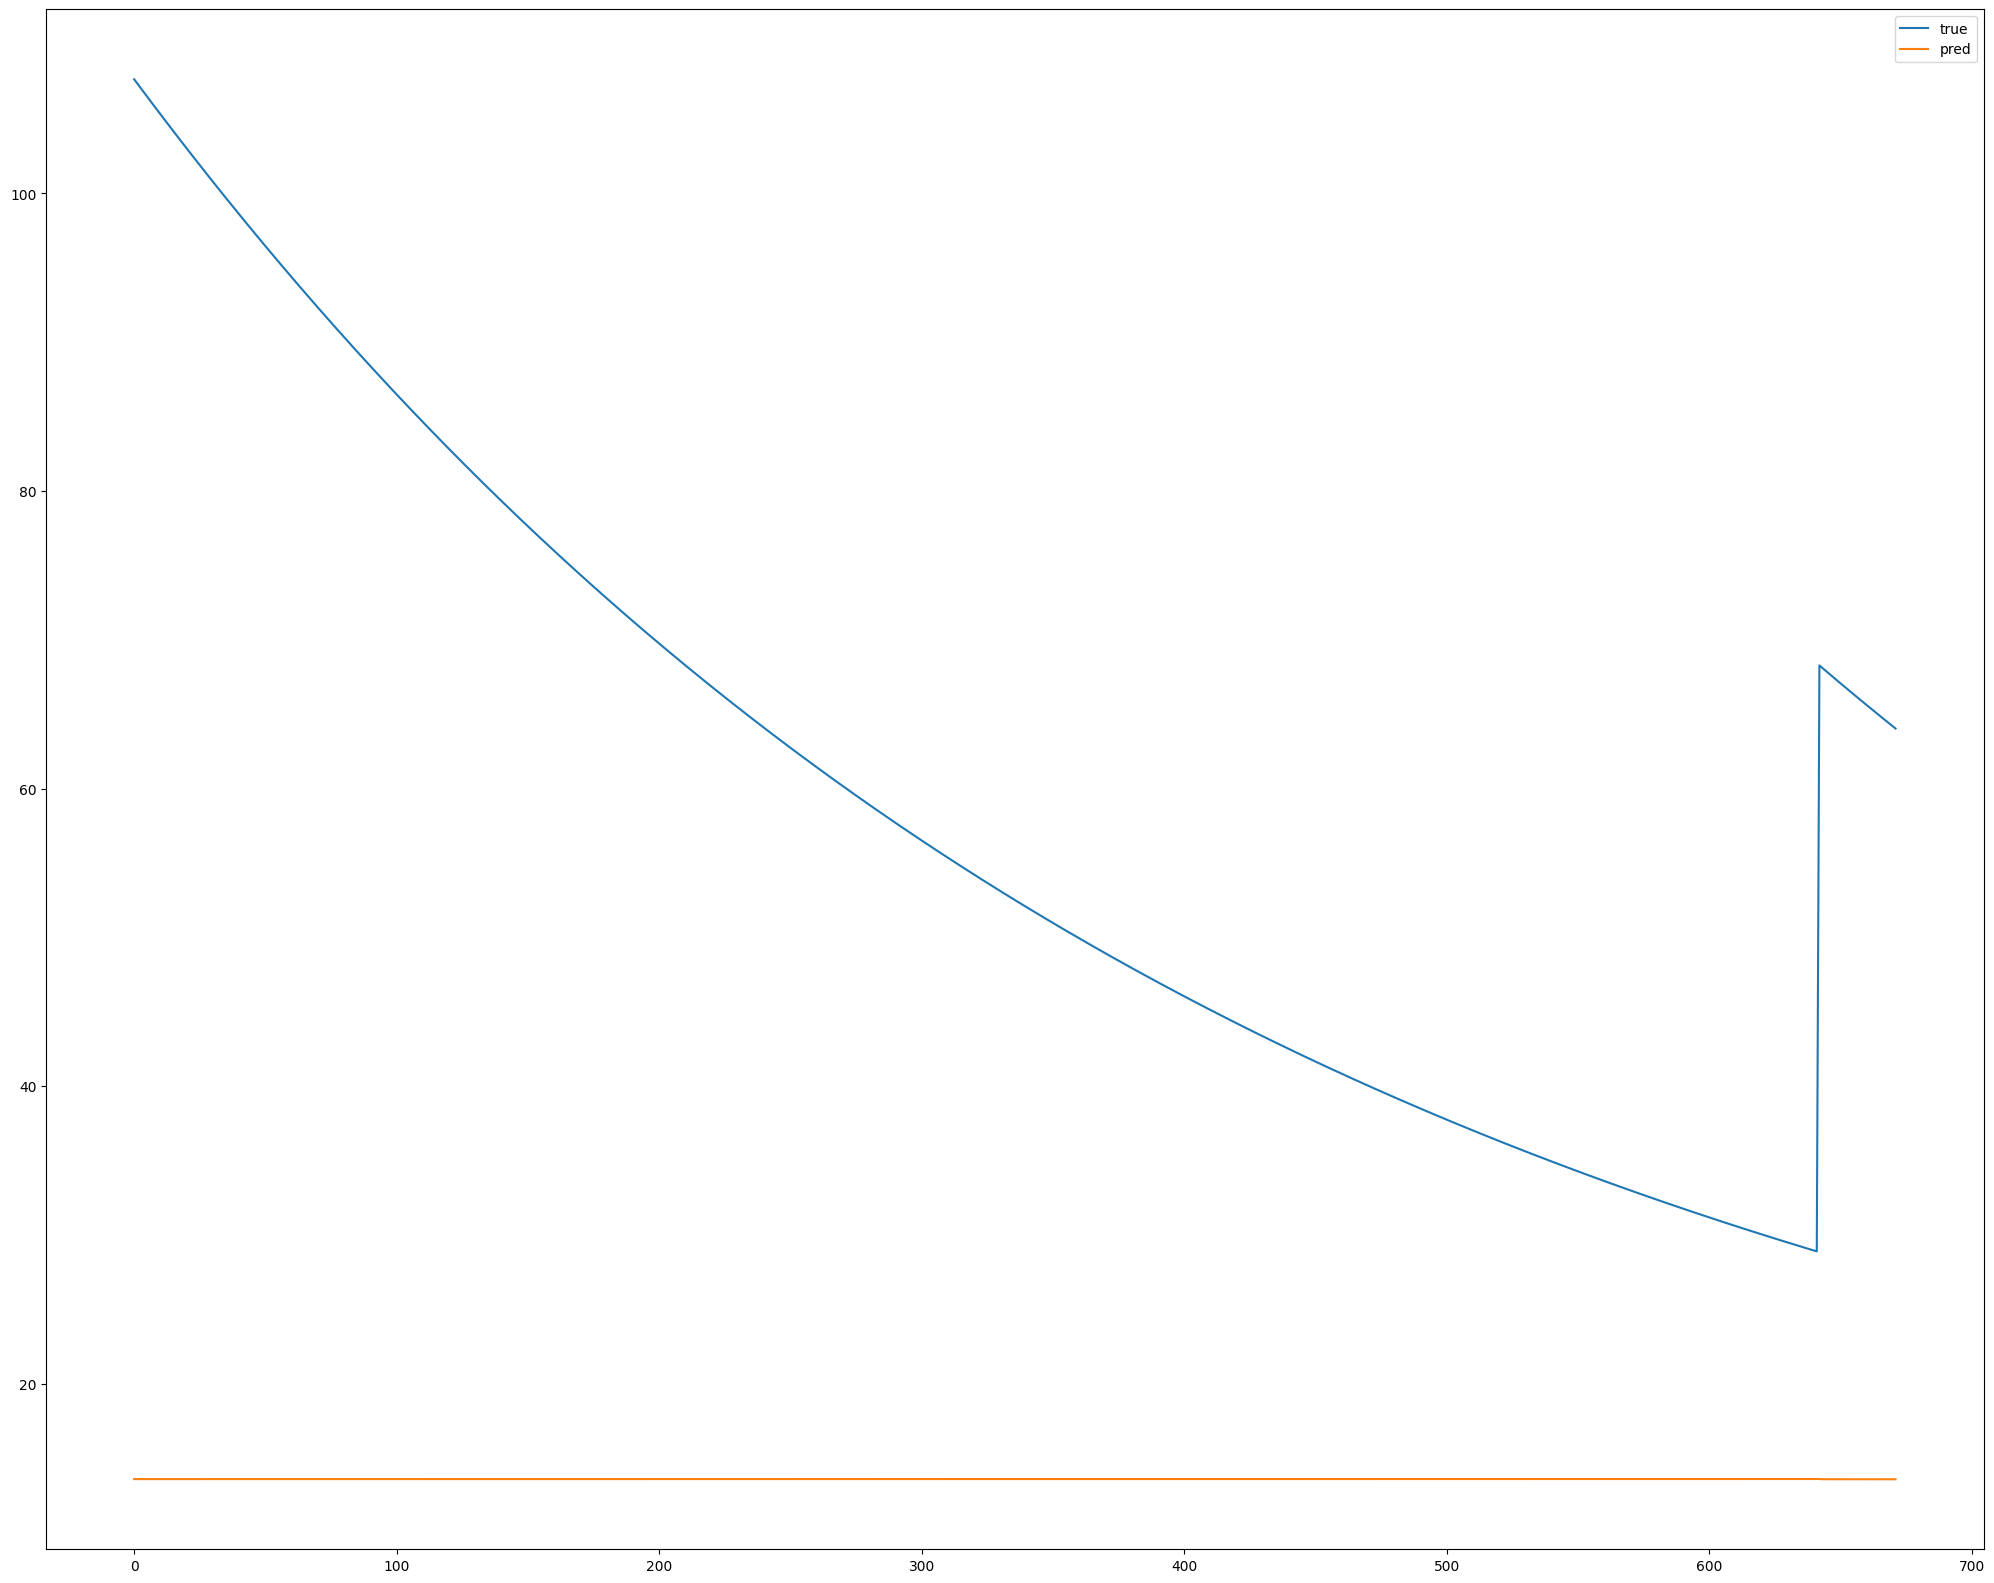

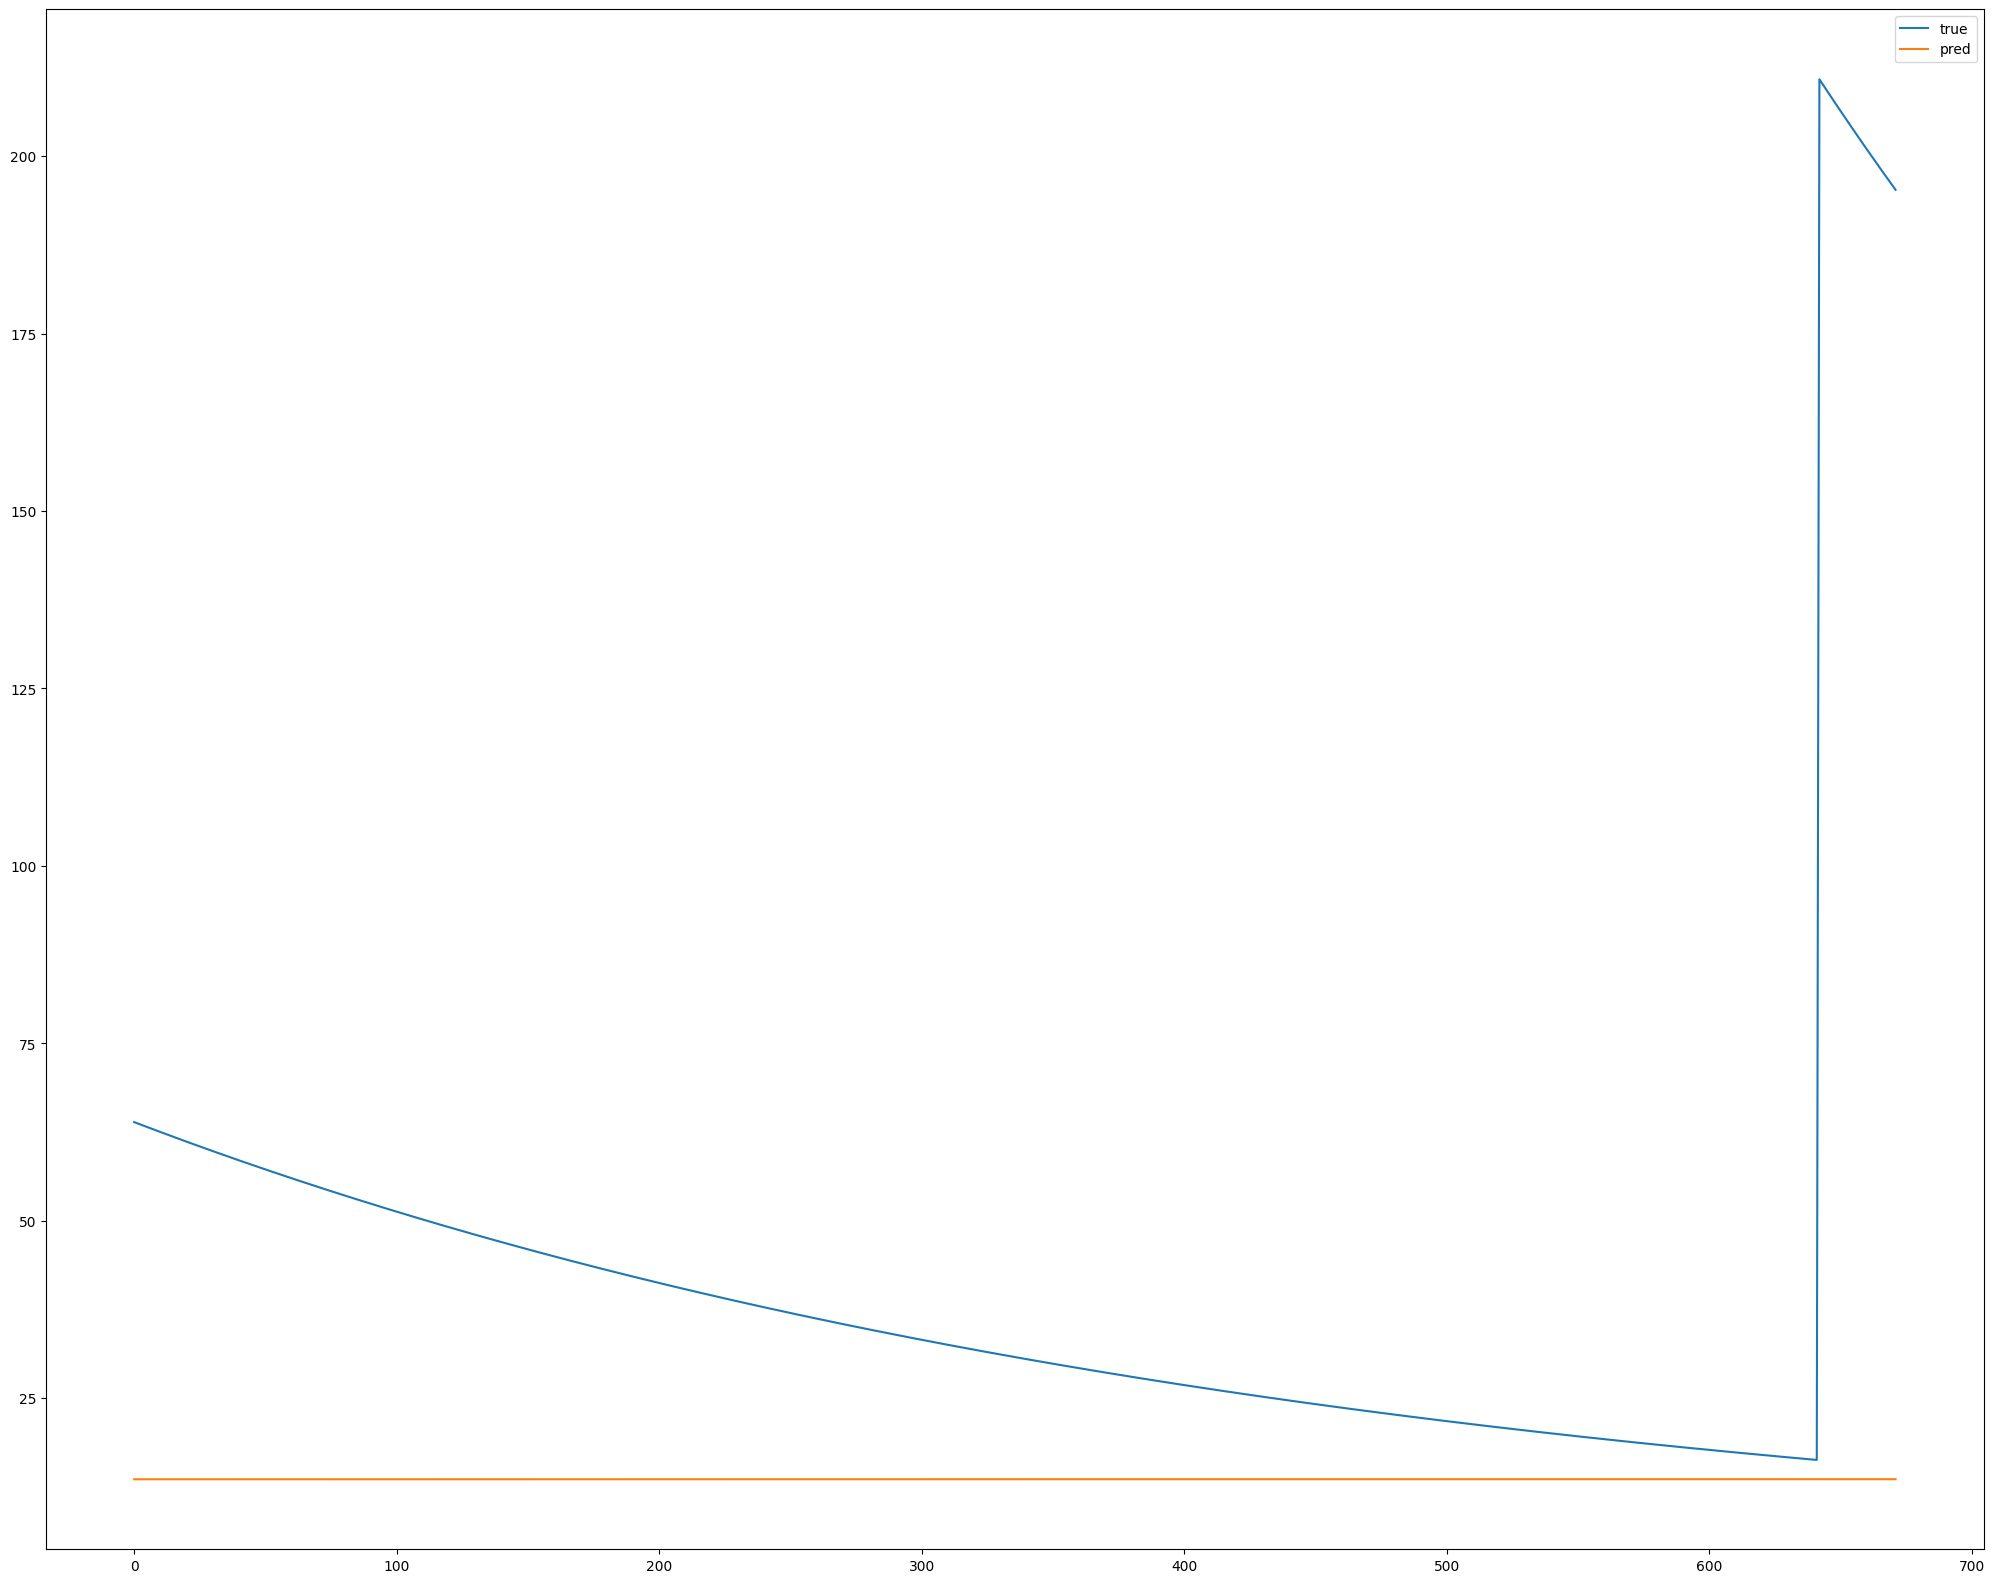

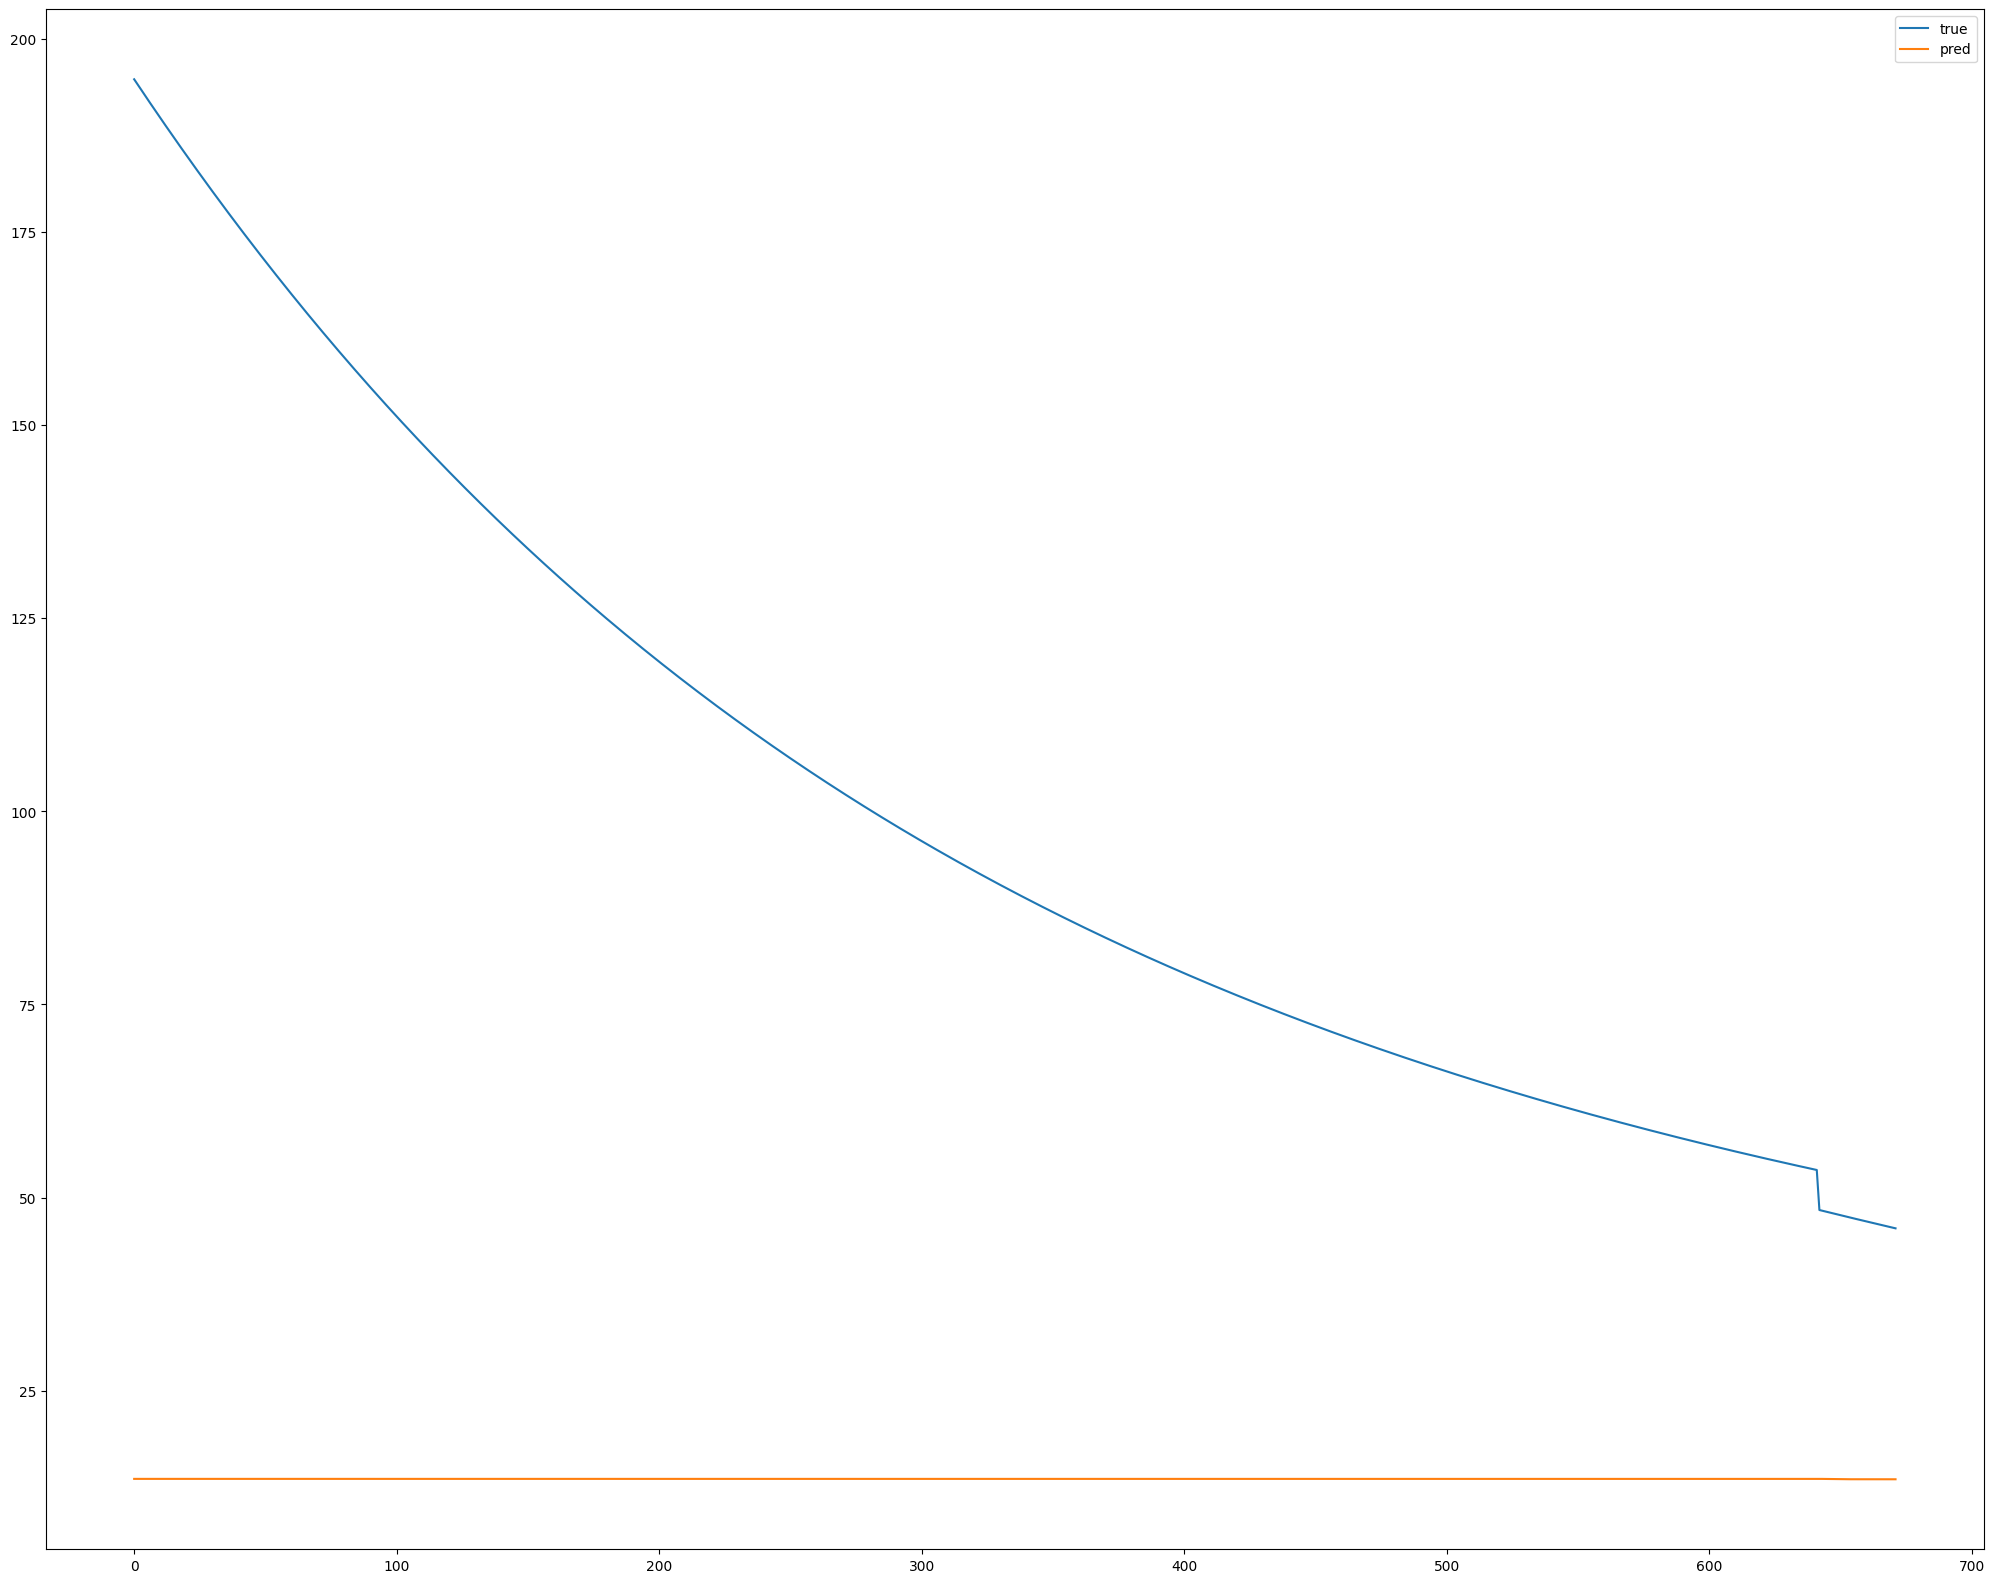

In [ ]:
from matplotlib import pyplot as plt

# true와 pred 비교 visualization

for i in range(10):
    plt.figure(figsize=(25, 20))
    plt.plot(range(672), testY_inverse[i * 672 : (i + 1) * 672], label="true")
    plt.plot(range(672), pred_inverse[i * 672 : (i + 1) * 672], label="pred")
    plt.legend()
    plt.show()